# *PD Model monitoring via assessing population stability*
1. In the last few sections we created a very nice probability of default model.We tested how it works with unfamiliar data and we created an easily interpretable scorecard based on it.Now imagine a year has passed since we implemented our model.A year is a long time and a lot of things may happen.And although it's highly unlikely the people who applied for a loan during this period may be very different from the borrowers whose data we use to build our PD model.
2. That's why we need to reassess if our PD model is still working well we should keep in mind that if the population of the new applicants is too different from the population of the borrowers used to train the model the results may be disastrous.In such cases we need to redevelop the model.
3. The process of assessing your model in light of new data is called Model maintenance.In reality such assessments are often scheduled for instance every six months or every year.Alternatively we may use the number of applicants as a benchmark.For example we can redevelop our model after acquiring 50000 or 100000 new data points.
4. One of the most convenient and widely accepted ways to compare the two populations is using a specific measure called the population stability index abbreviated PSI.The main goal of the population stability index is to determine whether the new data are too different from the original ones.
5. It is very important to realize that time wise the new data were acquired sooner to the present moment.Therefore our current borrowers and those to come are more likely to look like the new data we've acquired rather than the old one we trained on.
6. There are two populations.The first or the original population is the one we use to train the model on.The second population consists of all the new data we have acquired. We can take any discrete or continuous feature of applicants or borrowers and turn it into categories in cases not categorical.We've already seen how this is done via fine classing and coarse classing.
7. Say we have K categories in this feature.Of course there's a certain number of borrowers or applicants that fall into each category.We can also look at the relative number or the proportion of borrowers falling into each category.
8. Both populations are distributed in some way across the key categories of the feature.We can use the information about these distributions to assess if the populations differ with regard to this feature.For simplicity we call the data from the new population actual while the data from the original population
expected.
9. Now how can we assess whether the two populations are different with respect to a feature.For starters we should take the difference between the actual proportion and the expected proportion for any category j.Then we multiply this difference by the logarithm of the ratio of the actual proportion and the expected proportion for any category j.And finally the sum of these expressions for all k categories gives us the population stability index for this feature.
10. So this is our formula for the population stability index.PSI takes values between 0 and 1.The value of 0 means there is no difference between the two populations a value:-

*   The value of 0 means there is no difference between the two populations.
*   A value of 1 shows the two populations are absolutely different.
11. So the closer to zero the population stability index the smaller the difference between the two populations.Commonly we use the following table to summarize the different values PSI can take. 
* If PSI is less than 0.1 there is little to no difference in the two populations.
* If PSI is between 0.1 and 0.25 there is little change which requires investigation but usually no action is taken.
* When PSI is above 0.25, we usually take the issue to heart and investigate further what the underlying reason is.
12. In this case the statistical model has to be rebuilt.Interpreting these values properly is very important especially when it comes to assessing the population stability with respect to statistical model features such as those from our PD model.Once we interpret the values and there are no changes in the two populations we can keep using the original model.However if there's been a significant change with respect to a certain feature we will most likely have to rebuild the model.



## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [ ]:
#Loading the prepared dataset files of the original population.
loan_data_inputs_train=pd.read_csv('/content/drive/MyDrive/loan_data_prep_inputs_train_final.csv',index_col=0)
loan_data_inputs_test=pd.read_csv('/content/drive/MyDrive/loan_data_prep_inputs_test_final.csv',index_col=0)
loan_data_targets_train=pd.read_csv('/content/drive/MyDrive/loan_data_prep_targets_train.csv',index_col=0)
loan_data_targets_test=pd.read_csv('/content/drive/MyDrive/loan_data_prep_targets_test.csv',index_col=0)

In [ ]:
#Creating a backup of the new data
loan_data_backup=pd.read_csv('/content/drive/MyDrive/loan_data_2015.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore Data

In [ ]:
loan_data_prep=loan_data_backup.copy()
pd.options.display.max_columns=None
loan_data_prep.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [ ]:
loan_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# ***General Preprocessing of the new dataset***

## Starting with the emp_length varibale.Preprocessing the 'emp_length' variable.

In [ ]:
loan_data_prep['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [ ]:
loan_data_prep['emp_length_int']=loan_data_prep['emp_length'].str.replace('\+ years','')
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace('n/a', str(0))
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace(' years', '')
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace(' year', '')
loan_data_prep['emp_length_int']=pd.to_numeric(loan_data_prep['emp_length_int'])

In [ ]:
type(loan_data_prep['emp_length_int'][0])

numpy.float64

In [ ]:
loan_data_prep['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4., nan,  2.,  8.,  9.,  1.,  6.,  7.])

## Preprocessing the earliest_cr_line variable.First Converting 'earliest_cr_line' to timestamp variable 

In [ ]:
loan_data_prep['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [ ]:
loan_data_prep['earliest_cr_line_date']=pd.to_datetime(loan_data_prep['earliest_cr_line'], format='%b-%y')
type(loan_data_prep['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

We should set a reference date to calculate the time that has passed

In [ ]:
pd.to_datetime('2017-12-01')-loan_data_prep['earliest_cr_line_date']

0        10165 days
1         5997 days
2         2345 days
3         6940 days
4         6331 days
            ...    
421089    4839 days
421090   15981 days
421091    5205 days
421092    5175 days
421093    5844 days
Name: earliest_cr_line_date, Length: 421094, dtype: timedelta64[ns]

We get the difference in months

In [ ]:
loan_data_prep['mnths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_prep['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_data_prep['mnths_since_earliest_cr_line'].describe()

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: mnths_since_earliest_cr_line, dtype: float64

Everything seems fine except the minimum value which is negative.We need to 
solve this issue.We can start by displaying the data points where the negative time differences were calculated together with the earliest credit line variable we created.We can select specific rows and columns of a panda's data frame by their labels with the lock method.We need to specify which rows and columns we want to slice.We want all rows.The two columns we are interested in are earliest credit line date and months since earliest credit line.

In [ ]:
loan_data_prep.loc[:,['earliest_cr_line','earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_data_prep['mnths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mnths_since_earliest_cr_line
254,Jan-57,2057-01-01,-469.0
618,Aug-64,2064-08-01,-560.0
648,Jul-68,2068-07-01,-607.0
1808,Jan-65,2065-01-01,-565.0
2583,Sep-64,2064-09-01,-561.0
...,...,...,...
418890,Jun-68,2068-06-01,-606.0
420450,Jan-66,2066-01-01,-577.0
420642,Sep-68,2068-09-01,-609.0
420794,Sep-65,2065-09-01,-573.0


We can see that for all of these rows the earliest credit line date is way into the future after the year 2060; most likely what has happened is that when we were turning the strings into dates variables ending in 60 something ,they were not interpreted correctly and were turned into year 2060 something instead of 1960 something if this hypothesis is true.The best way to solve this would be to turn those dates to the actual 1960 dates and recalculate the difference.However this process may be difficult and time consuming.Most likely the issue arose in the first place because the origin of the built in timescale starts after the 60s perhaps with the year 1970.On the other hand we can argue that since we have more than 880000 observations we don't need these.But data is very important for us and we don't like removing them so easily and in such cases it is best to choose an approach that is somewhere in the middle between those two. Since we need the difference in month between the date the earliest credit line was issued and December 2017, we can input values directly into the months since earliest credit line variable but what values shall we impute.Well we know that we get the negative values for credit line issues at a very distant point in the past in the 60s that is a longer period than all other credit lines that we normally get values for.So why not substitute the negative values with the maximum observed normal or positive difference.That way even if we don't calculate the exact number of months that have passed since the earliest credit line was issued for those issued in the 60s we put a very large value and we still get pretty close to the real picture.So how do we do that?First from our data frame we select only the months since earliest credit line column and then from this selection we select only the observations with negative values.Next we assign these rows to be equal to the maximum of the months since earliest credit line.Finally let's check the minimum of months since earliest credit line again.Great.It's 73.We've imputed the value successfully and our variable is ready for analysis.

In [ ]:
loan_data_prep['mnths_since_earliest_cr_line'][loan_data_prep['mnths_since_earliest_cr_line']<0]=loan_data_prep['mnths_since_earliest_cr_line'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
min(loan_data_prep['mnths_since_earliest_cr_line'])

61.0

## **Preprocessing the the ‘term’ variable**

In [ ]:
loan_data_prep['term']

0          60 months
1          36 months
2          36 months
3          60 months
4          60 months
             ...    
421089     36 months
421090     36 months
421091     60 months
421092     60 months
421093     36 months
Name: term, Length: 421094, dtype: object

In [ ]:
loan_data_prep['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         421094
unique             2
top        36 months
freq          283172
Name: term, dtype: object

In [ ]:
loan_data_prep['term_int'] = loan_data_prep['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [ ]:
type(loan_data_prep['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [ ]:
loan_data_prep['term_int'] = pd.to_numeric(loan_data_prep['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data_prep['term_int']

0         60
1         36
2         36
3         60
4         60
          ..
421089    36
421090    36
421091    60
421092    60
421093    36
Name: term_int, Length: 421094, dtype: int64

In [ ]:
type(loan_data_prep['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

## Preprocessing the 'issue_d' variable

In [ ]:
loan_data_prep['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [ ]:
# Assume we are now in December 2017
loan_data_prep['issue_d_date'] = pd.to_datetime(loan_data_prep['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data_prep['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_prep['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data_prep['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean         29.044629
std           3.458162
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          35.000000
Name: mths_since_issue_d, dtype: float64

# Preprocessing few discrete variables.<br>
We will focus on several discrete or categorical variables namely:-<br>
1.   grade.
2.   sub grade.
3.   Home ownership.
4.   verification status.
5.   loan status.
6.   purpose.
7.   addr_state
8.   initial list status.<br>
It takes minimum effort what we want to do with the discrete features.We will create dummy variables for all of their categories.Dummy variables are binary indicators they take the value of 1 if the observation belongs to a category and the value of 0 if it doesn't.<br>
We need k-1 dummy varibales to represent information about k categories.

### Applying to the grade variable first and then to other categorical varables

In [ ]:
pd.get_dummies(loan_data_prep['grade'])

,A,B,C,D,E,F,G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [ ]:
#pd.get_dummies(Series,[prefix],[prefix_sep]) creates dummies for a given categorical varibale,
#We can specify the prefix to the name of the dummy varibales using the prefix and the prefix_sep arguements.

pd.get_dummies(loan_data_prep['grade'], prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [ ]:
#Applying this to the other categorical variables
loan_data_dummies_prep=[pd.get_dummies(loan_data_prep['grade'], prefix='grade',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['sub_grade'], prefix='sub_grade',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['home_ownership'], prefix='home_ownership',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['verification_status'], prefix='verification_status',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['loan_status'], prefix='loan_status',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['purpose'], prefix='purpose',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['addr_state'], prefix='addr_state',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['initial_list_status'], prefix='initial_list_status',prefix_sep=':')]


In [ ]:
loan_data_dummies_prep=pd.concat(loan_data_dummies_prep,axis=1) #Please don't run this again and again as it would create duplicate columns
loan_data_prep=pd.concat([loan_data_prep,loan_data_dummies_prep],axis=1) #Please don't run this again and again as it would create duplicate columns
loan_data_prep.info()
loan_data_prep.columns.values
loan_data_prep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Columns: 202 entries, id to initial_list_status:w
dtypes: datetime64[ns](2), float64(48), int64(7), object(23), uint8(122)
memory usage: 306.0+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0,10.0,1990-02-01,334.0,60,2015-12-01,24.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.

# Check for missing values and clean

In [ ]:
loan_data_prep.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
pd.options.display.max_rows=None
loan_data_prep.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

Variables we will need for analysis:-
1.   annual_inc
2.   delinq_2yrs
3.   inq_last_6mths
4.   open_acc
5.   pub_rec
6.   total_acc
7.   acc_now_delinq
8.   total_rev_hi_lim
9.   emp_length_int
10.   mths_since_earliest_cr_line











In [ ]:
pd.options.display.max_rows=100

In [ ]:
#Replace missing values of total_rev_hi_lim with funded_amnt
loan_data_prep['total_rev_hi_lim'].fillna(loan_data_prep['funded_amnt'],inplace=True)

In [ ]:
loan_data_prep['total_rev_hi_lim'].isnull().sum()

0

In [ ]:
# We fill the missing values of annual_inc with the mean value of the non-missing values.
loan_data_prep['annual_inc'].fillna(loan_data_prep['annual_inc'].mean(), inplace=True)
# We fill the missing values with zeroes.
loan_data_prep['mnths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data_prep['acc_now_delinq'].fillna(0, inplace=True)
loan_data_prep['total_acc'].fillna(0, inplace=True)
loan_data_prep['pub_rec'].fillna(0, inplace=True)
loan_data_prep['open_acc'].fillna(0, inplace=True)
loan_data_prep['inq_last_6mths'].fillna(0, inplace=True)
loan_data_prep['delinq_2yrs'].fillna(0, inplace=True)
loan_data_prep['emp_length_int'].fillna(0, inplace=True)


# PD Model<br>
Data Preparation<br>
Dependent Variable,Good/Bad (Default) Definition.<br>
Default and Non-Default Accounts.

In [ ]:
loan_data_prep['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [ ]:
loan_data_prep['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [ ]:
loan_data_prep['loan_status'].value_counts()/loan_data_prep['loan_status'].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

We take the Good accountS (non-default) as 1 and Bad (deafault) as 0

In [ ]:
#Assigning respetive loans to good and bad acounts
loan_data_prep['good_bad']=np.where(loan_data_prep['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (16-30 days)']),0,1)
loan_data_prep['good_bad']

0         1
1         1
2         1
3         1
4         1
         ..
421089    1
421090    1
421091    1
421092    1
421093    1
Name: good_bad, Length: 421094, dtype: int64

## Some thoretical concepts

*Fine Classing and Coarse Classing:-*<br>

---


In reality there is a well-established methodology **to try to split continuous variables into categories**.Once they are categorical we proceed by bundling them up depending on their properties.This process is called Fine classing.<br>

***Coarse classing is the process of constructing new categories based on the initial ones***.Throughout our course study we will deal with variables that have 5/6 or even 50 or more categories based on the weights of evidence.We will combine them into bigger categories.Usually we prefer categories that have similar weight of evidence to be bundled together. In this way we lower the number of dummies and improve our PD model.

Weight of evidence (WOE) would tell us to what extent an independent variable 
would predict a dependent varibale.<br>
In other words how much evidence does the independent variable have with respect to differences in the dependent variable.<br>
More specifically weight of evidence shows the extent to which each of the different categories of an independent variable explains the dependent one.<br>

***Formula for WOE:-<br>***

---


The ***formula of the weight of evidence*** is the ***natural logarithm of the ratio of the proportion of observations of the first type of outcome of the dependent variable that fall into the respective category of the independent variable and the proportion of observations of the second type of outcome of the dependent variable that fall into the respective category of the independent variable.***<br>
The two types of outcome are non defaulted or good and defaulted or bad.**So the weight of evidence would be the natural logarithm of the ratio of the proportion of goods from the total number of goods that fall into the category to the proportion of bads from the total number of bads that fall into a category.**<br>

Method to calculae WOE:-<br>

---
Say we want to calculate the weight of evidence for the independent variable education.Education has two categories higher education or no higher education. From the 4600 borrowers with higher education,4000 are good and 600 are bad. From the 15400 with no higher education,12000 are good and 3400 are bad.Now there are 16000 good borrowers in total and 4000 bad borrowers.In total the proportion of good borrowers who have a higher education is 4000/16000 or 25 percent respectively.The proportion of good borrowers who don't have higher education is 12000/16000 or 75 percent.Similarly the proportion of bad borrowers who have higher education is 600/4000 or 15 percent and the proportion of bad borrowers who don't have higher education is 3400/4000 or 85 percent.So weight of evidence for having higher education with respect to being a good or a bad borrower is the natural logarithm of the proportion of good borrowers who have higher education to the proportion of bad borrowers who have higher education.That is the natural logarithm of 25 percent divided by 15 percent or about 0.51.

**Note that the further away from zero the weight evidence the better the category in differentiating between the two outcomes of the dependent variable.**

***Information Value(IV)***<br>

---


With respect to explaining the dependent variable weight of evidence gives us an insight into how useful a given category of an independent variable is.Of course that would not matter if the original independent variable was useless to begin with.We can use the Information Value to find the answer to this more fundamental question.Assume an original independent variable has been split into categories.It may have been categorical originally or categories may have been determined through fine classing or course classing.It doesn't really matter.Suppose there are K categories of this variable then we can calculate the weight of evidence for each of the key categories.We already know how to do that.From there we can weigh these weights of evidence of each category.We can weigh each by the difference of the proportion of goods from the total number of goods that fallinto the respective category and the proportion of bads from the total number of bads that fall into the respective category.Then we simply sum them to reach a weighted average of the weights of evidence of the K categories.The results is called the information value of the original independent variable with respect to the dependent variable.**The information value shows us how much information the original independent variable brings with respect to explaining the dependent variable.**Therefore the information value can be used to identify the original independent variables which explain
the dependent variable best.Hence as you are probably anticipating you can use information value for pre-selection.<br>
So if we have 100 contestants for predictors in a regression,the information value can help us preselect the best five or 10 or 20 independent variables to include in a statistical model.The information value was always in the range from 0 to 1. Greater value meanS that the original variable yields more information with respect to the outcome.<br>

This metric is commonly interpreted as follows:- 
1. a value lower than 0.02 means that the independent variable is not useful for prediction of the outcome.
2. a value between 0.02 and 0.1 means it has weak predictive power.
3. a value between 0.1 and 0.3 means its predictive power is medium. 
4. a value between 0.3 and 0.5 means that its predictive power is strong.
5. and a value greater than 0.5 means it has a suspiciously strong predictive
power or in other words that it is most certainly too good to be true.<br>



In [ ]:
#We drop the good_bad variables since it contains the target variables.
df_inputs_prepr=loan_data_prep.drop('good_bad',axis=1)
df_targets_prepr=loan_data_prep['good_bad']
#df_inputs_prepr=loan_data_prep_inputs_test
#df_targets_prepr=loan_data_prep_targets_test
#Now we can create a new data frame called df1 where we will store only the independent variable 'grade' from the df_inputs_prepr.
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
# we will calculate the weight of evidence of this discrete variable 'grade'.
#The formula was equal to the natural logarithm of the ratio of the proportion of good borrowers to the proportion of bad borrowers.
#Therefore to find the weight of evidence of grade we must first find the proportion of good and bad.
#-----------------------------------------------------------------------
#Let's start with the number of borrowers for each grade.
#To do that we can count the rows that contain each of the grades.
#We do this with the group-by method grouped by splitting the data according to certain criteria.
#In our case we want to split by grade.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [ ]:
#Another piece of information we may need is the proportion of good and bad borrowers are within each group.
#This can be summarized either by the proportion of good borrowers or by the proportion of bad borrowers.
#We can apply the same statement as above except that at the end we apply the mean method instead of the count method.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.997505
1,B,0.995136
2,C,0.990528
3,D,0.982076
4,E,0.976765
5,F,0.962208
6,G,0.955699


In [ ]:
#Finally we conctenate the two dataframes
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [ ]:
df1

,grade,good_bad,grade,good_bad
0,A,73335,A,0.997505
1,B,117606,B,0.995136
2,C,120567,C,0.990528
3,D,62654,D,0.982076
4,E,34948,E,0.976765
5,F,9817,F,0.962208
6,G,2167,G,0.955699


In [ ]:
df1=df1.iloc[:,[0,1,3]]
df1.columns=[df1.columns.values[0],'n_obs','prop_good']
df1

,grade,n_obs,prop_good
0,A,73335,0.997505
1,B,117606,0.995136
2,C,120567,0.990528
3,D,62654,0.982076
4,E,34948,0.976765
5,F,9817,0.962208
6,G,2167,0.955699


In [ ]:
#Let's calculate the proportion of observations that falls into each grade.It is the number of observations in each row divided by the sum of the number of observations in each row.
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,73335,0.997505,0.174154
1,B,117606,0.995136,0.279287
2,C,120567,0.990528,0.286318
3,D,62654,0.982076,0.148789
4,E,34948,0.976765,0.082993
5,F,9817,0.962208,0.023313
6,G,2167,0.955699,0.005146


In [ ]:
#First let's calculate the number of good borrowers and the number of bad borrowers by grade.
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,73335,0.997505,0.174154,73152.0,183.0
1,B,117606,0.995136,0.279287,117034.0,572.0
2,C,120567,0.990528,0.286318,119425.0,1142.0
3,D,62654,0.982076,0.148789,61531.0,1123.0
4,E,34948,0.976765,0.082993,34136.0,812.0
5,F,9817,0.962208,0.023313,9446.0,371.0
6,G,2167,0.955699,0.005146,2071.0,96.0


In [ ]:
#The percentage of good borrowers in the respective grade category equals the number of good borrowers in the respective category 
#divided by the total number of good borrowers, which is the sum of good borrowers in all categories.
#Same holds true for bad borrowers.
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568
1,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054
2,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224
4,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881
5,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299
6,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331


In [ ]:
#Calculating WOE
df1['WOE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568,1.416597
1,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054,0.746869
2,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643,0.075695
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224,-0.570675
4,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881,-0.835605
5,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299,-1.337067
6,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331,-1.502773


In [ ]:
#Sorting the values
df1=df1.sort_values(['WOE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331,-1.502773
1,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299,-1.337067
2,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881,-0.835605
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224,-0.570675
4,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643,0.075695
5,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054,0.746869
6,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568,1.416597


In [ ]:
#Calculate the differences in the proportion of good loans between two subsequent categories  and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good']=df1['prop_good'].diff().abs()
df1['diff_WOE']=df1['WOE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE
0,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331,-1.502773,NaN,NaN
1,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299,-1.337067,0.006509,0.165706
2,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881,-0.835605,0.014557,0.501463
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224,-0.570675,0.005311,0.264930
4,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643,0.075695,0.008452,0.646370
5,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054,0.746869,0.004608,0.671173
6,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568,1.416597,0.002368,0.669728


In [ ]:
#Calculating the Information Value
df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WOE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331,-1.502773,NaN,NaN,0.565645
1,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299,-1.337067,0.006509,0.165706,0.565645
2,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881,-0.835605,0.014557,0.501463,0.565645
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224,-0.570675,0.005311,0.264930,0.565645
4,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643,0.075695,0.008452,0.646370,0.565645
5,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054,0.746869,0.004608,0.671173,0.565645
6,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568,1.416597,0.002368,0.669728,0.565645


## Automating Calculations for Information Value.<br>
Well we can achieve this by writing a function that performs these calculations for any given pair of categorical variable and dependent variable.

In [ ]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]] #keeping only the first second and fourth columns
    df.columns=[df.columns.values[0],'n_obs','prop_good'] #Assign specific column names
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum() #Caculate the proportion of observations from the total number of observations
    df['n_good']=df['prop_good']*df['n_obs'] #Calculate the number of good borrowers
    df['n_bad']=(1-df['prop_good'])*df['n_obs'] #Calculate the number of bad borrowers
    df['prop_n_good']=df['n_good']/df['n_good'].sum() #Calculate the proportion of good borrowers from the total number of borrowers
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum() #Calculate the proportion of bad borrowers from the total number of borrowers
    df['WOE']=np.log(df['prop_n_good']/df['prop_n_bad']) #Calculate Weight Of Evidence
    df=df.sort_values(['WOE']) #Sort by WOE and Reset the index
    df=df.reset_index(drop=True) #Sort by WOE and Reset the index
    df['diff_prop_good']=df['prop_good'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['diff_WOE']=df['WOE'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WOE'] #we find the information value.
    df['IV']=df['IV'].sum() #we find the information value.
    return df


In [ ]:
df_temp=woe_discrete (df_inputs_prepr, 'grade', df_targets_prepr)
df_temp 

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,2167,0.955699,0.005146,2071.0,96.0,0.004969,0.022331,-1.502773,NaN,NaN,0.565645
1,F,9817,0.962208,0.023313,9446.0,371.0,0.022663,0.086299,-1.337067,0.006509,0.165706,0.565645
2,E,34948,0.976765,0.082993,34136.0,812.0,0.081901,0.188881,-0.835605,0.014557,0.501463,0.565645
3,D,62654,0.982076,0.148789,61531.0,1123.0,0.147629,0.261224,-0.570675,0.005311,0.264930,0.565645
4,C,120567,0.990528,0.286318,119425.0,1142.0,0.286532,0.265643,0.075695,0.008452,0.646370,0.565645
5,B,117606,0.995136,0.279287,117034.0,572.0,0.280795,0.133054,0.746869,0.004608,0.671173,0.565645
6,A,73335,0.997505,0.174154,73152.0,183.0,0.175511,0.042568,1.416597,0.002368,0.669728,0.565645


## Preprocessing Discrete Varables:Visualizing Results

In [ ]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WOE']
    plt.figure(figsize=(10,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight Of Evidence')
    plt.title(str('Weight of Evidence by ' +df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

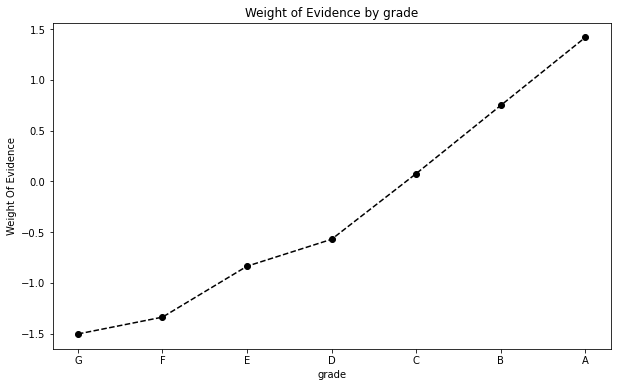

In [ ]:
plot_by_woe(df_temp)

We've decided to use the probability of default model.<br>
1. Based on weight of evidence we must decide how to organize the original categories of the discrete variables into dummy variables for the PD model.
2. Remember that the grade variable reflects external credit ratings. Of all variables it's the one that should have very good patterns on weights of evidence.Indeed as you can see on the chart weight of evidence increases almost monotonously with the increase of external credit rating grades from the worst G to the best A.The greater the grade the greater the weight of evidence.That means loans with greater external rating are better on average based on this pattern of weight of evidence.Let's keep the original seven categories of the grade variable as independent variables for the PD model.So the first 7 dummy variables will be the variables from grade'A' to grade 'G'.When we put these dummy variables into where a regression model we should keep one out as a reference category; the category against which the impact of all others on the outcome will be assessed.
3. At this stage it's a good idea to keep a record of which dummy variable will be a reference category when we create all dummy variables for each original variable. Let's establish that we'll always keep the category with the worst credit risk as a reference category;that is the dummy variable that has or is composed of several categories that have the **lowest weight of evidence**.So **grade:G'** will be the first item in our list of reference categories.

In [ ]:
df_temp=woe_discrete (df_inputs_prepr, 'home_ownership', df_targets_prepr) #Calculation of the WoE for the Home Ownership Discrete Variable.
df_temp 

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,RENT,167644,0.987372,0.398115,165527.0,2117.0,0.397142,0.492440,-0.215078,NaN,NaN,inf
1,OWN,45766,0.989905,0.108684,45304.0,462.0,0.108696,0.107467,0.011374,0.002533,0.226451,inf
2,MORTGAGE,207682,0.991718,0.493196,205962.0,1720.0,0.494157,0.400093,0.211155,0.001813,0.199782,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.008282,inf,inf


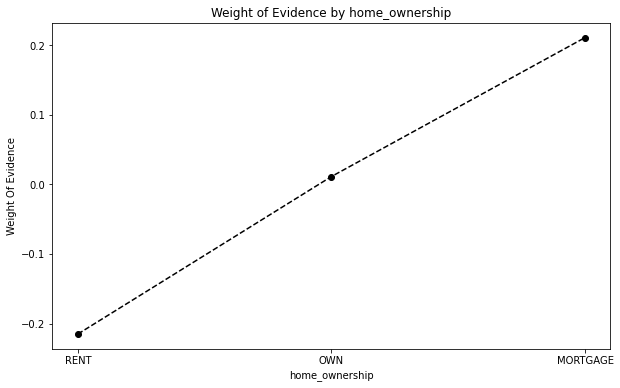

In [ ]:
plot_by_woe(df_temp)

1. Clearly the categories 'OTHER' and 'NONE' are associated with the highest probability of default.While this seems  like a breakthrough it is worth looking into their proportion of the total number of observations in the loan dataset.
2. Fortunately we already have that information over here. We can see that there are very few loans associated with these categories; less than zero point one percent each.
3. Also note that weight of evidence could not be calculated for the Home Ownership category 'ANY' because there is only one observation with this home ownership status.
4. It really doesn't make sense to have dummy variables for these categories so we don't want to have dummies for them but we don't want to remove them either because that would imply losing the information about these customers.
5. In these cases we combine such underrepresented categories that are similar to them.This is another extremely important pre processing step.
6. So let's combine 'OTHER', 'NONE' and 'ANY' with the risk category with enough number of observations.That is the category 'RENT'.
7. Borrowers with category 'OWN' have a considerably higher weight of evidence than the ones with category 'RENT'.So these two categories will be in two different dummy variables.
8. Finally there is the 'MORTGAGE' category the mortgage category encompasses about half of all borrowers.Hence it will be in a separate dummy variable.
9. Thus for the Home Ownership variable will have one dummy variable for categories 'RENT' 'OTHER' 'NONE' and a separate dummy variable for category 'OWN' and one dummy variable for category 'MORTGAGE'.
10. we've already created dummy variables for the original categories of all discrete variables in the lecture where we pre process the discrete variables.
We can easily use them as independent variables for the PD model.
11. The only thing we have left is to combine the dummy variables for RENT,
OTHER NONE and ANY .Let's name it 'Home_Ownership_rent_other_none_any'.This dummy variable will be equal to 1 if the borrower has any of the four categories and zero otherwise.


In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:ANY']])

In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']

0         0
1         0
2         1
3         1
4         0
         ..
421089    1
421090    0
421091    1
421092    1
421093    1
Name: home_ownership:RENT_OTHER_NONE_ANY, Length: 421094, dtype: uint8

### Preprocessing for 'addr_state' variable.

In [ ]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,UT,2836,0.984838,0.006735,2793.0,43.0,0.006701,0.010002,-0.400541,NaN,NaN,inf
1,HI,2083,0.985118,0.004947,2052.0,31.0,0.004923,0.007211,-0.381629,0.000280,0.018912,inf
2,NV,5924,0.985989,0.014068,5841.0,83.0,0.014014,0.019307,-0.320395,0.000872,0.061234,inf
3,AL,5347,0.986347,0.012698,5274.0,73.0,0.012654,0.016981,-0.294127,0.000358,0.026268,inf
4,OK,3968,0.986643,0.009423,3915.0,53.0,0.009393,0.012328,-0.271933,0.000296,0.022194,inf
5,WY,900,0.986667,0.002137,888.0,12.0,0.002131,0.002791,-0.270147,0.000024,0.001786,inf
6,VA,12033,0.986953,0.028576,11876.0,157.0,0.028494,0.036520,-0.248183,0.000286,0.021964,inf
7,MN,7799,0.988204,0.018521,7707.0,92.0,0.018491,0.021400,-0.146116,0.001251,0.102067,inf
8,KS,3736,0.988490,0.008872,3693.0,43.0,0.008860,0.010002,-0.121218,0.000287,0.024899,inf
9,NM,2351,0.988516,0.005583,2324.0,27.0,0.005576,0.006281,-0.119004,0.000025,0.002214,inf


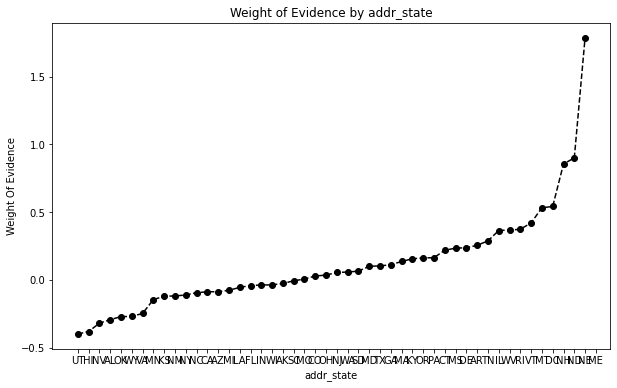

In [ ]:
plot_by_woe(df_temp)

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

In [ ]:
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID']=0

In [ ]:
if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA']=0

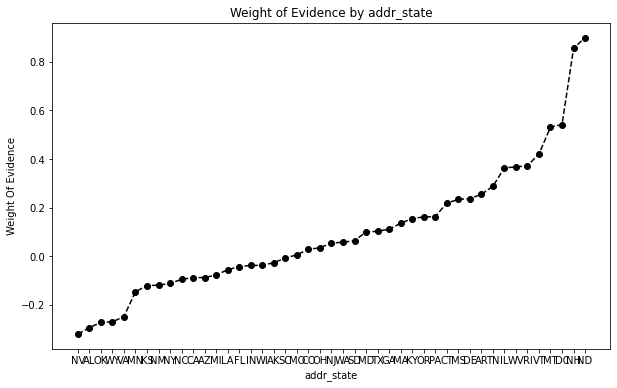

In [ ]:
#Let's focus on the other 46 states.We can do that by running our planning function on the results data frame again taking all rows except for the first two and the last two.
plot_by_woe(df_temp.iloc[2:-2, : ])

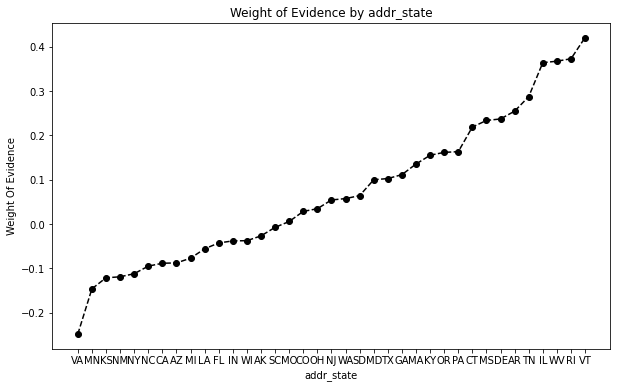

In [ ]:
#et's take a look at the remaining 38 states to get a better perspective.
plot_by_woe(df_temp.iloc[6:-6])

In [ ]:
#Combining the dummy variable of states
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing discrete variable like verification_status,purpose,initial_list_status

In [ ]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,Verified,123016,0.987554,0.292134,121485.0,1531.0,0.291474,0.356129,-0.200342,NaN,NaN,0.037187
1,Source Verified,179565,0.989519,0.426425,177683.0,1882.0,0.426308,0.437776,-0.026546,0.001965,0.173796,0.037187
2,Not Verified,118513,0.992524,0.281441,117627.0,886.0,0.282218,0.206094,0.314345,0.003005,0.340891,0.037187


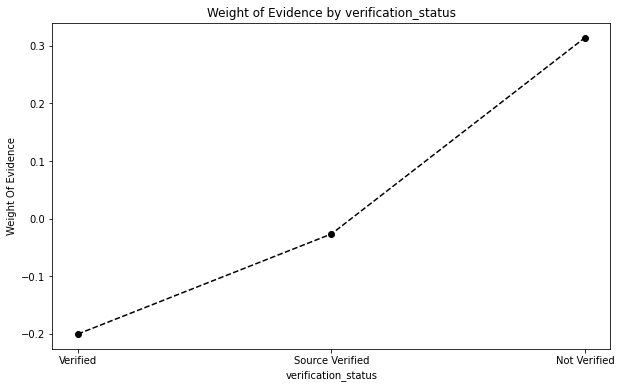

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,house,1438,0.978442,0.003415,1407.0,31.0,0.003376,0.007211,-0.758984,NaN,NaN,inf
1,moving,2420,0.978512,0.005747,2368.0,52.0,0.005681,0.012096,-0.755655,0.000070,0.003329,inf
2,small_business,3364,0.978597,0.007989,3292.0,72.0,0.007898,0.016748,-0.751628,0.000085,0.004027,inf
3,medical,3938,0.984256,0.009352,3876.0,62.0,0.009300,0.014422,-0.438787,0.005659,0.312840,inf
4,renewable_energy,224,0.986607,0.000532,221.0,3.0,0.000530,0.000698,-0.274662,0.002351,0.164126,inf
5,vacation,2249,0.986661,0.005341,2219.0,30.0,0.005324,0.006978,-0.270598,0.000054,0.004064,inf
6,major_purchase,7449,0.986710,0.017690,7350.0,99.0,0.017635,0.023029,-0.266876,0.000049,0.003721,inf
7,other,19204,0.986930,0.045605,18953.0,251.0,0.045473,0.058386,-0.249947,0.000220,0.016929,inf
8,debt_consolidation,250020,0.988989,0.593739,247267.0,2753.0,0.593258,0.640381,-0.076435,0.002059,0.173513,inf
9,car,3466,0.989613,0.008231,3430.0,36.0,0.008229,0.008374,-0.017415,0.000625,0.059019,inf


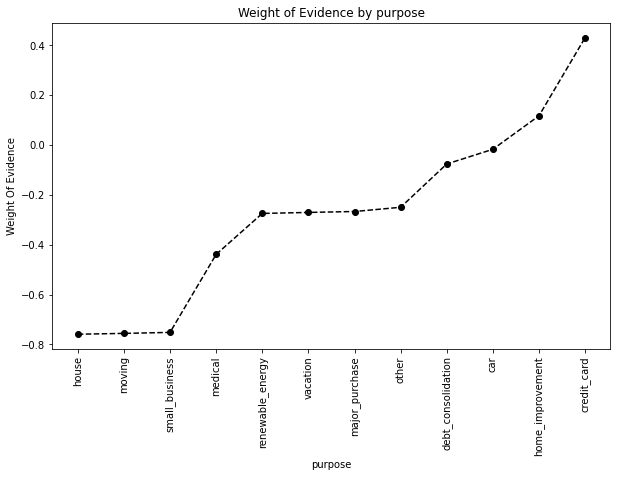

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [ ]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,f,153843,0.984848,0.365341,151512.0,2331.0,0.363517,0.542219,-0.399845,NaN,NaN,0.130348
1,w,267251,0.992636,0.634659,265283.0,1968.0,0.636483,0.457781,0.329567,0.007788,0.729412,0.130348


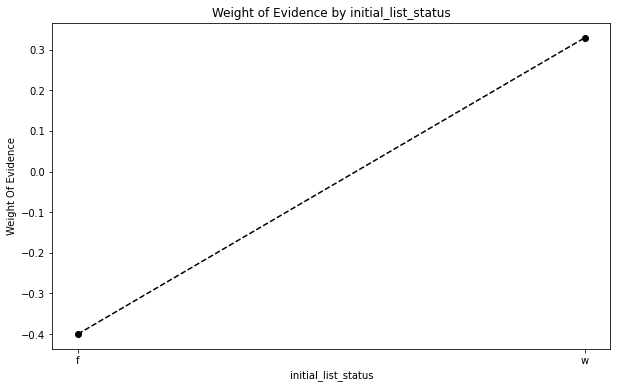

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

## Preprocessing Continuous Varables:Visualizing Results
We pre-process the original discrete variables in our data so it's time to do the same for the continuous variables.As you can probably remember the regulator requires the probability of default model to be easy to interpret,
so it must contain only dummy variables as predictive variables.
1. Discrete variables are split into categories as they come. That is they were fine classed then we course class them by evaluating the weights of evidence for the initial categories.
2. Now we have to do the same with the continuous variables with just one additional prior step.We have to split them into categories.
2. Later we are going to treat them just like the original categories of the discrete variables.
3. With that in mind let's try to structure our work for the continuous variables the same way we did for the discrete ones.
4. Suppose we have performed fine classing for a continuous variable and we have ended up with many categorical variables that encompass the whole range of values of the continuous variable.So we'll need to calculate weight of evidence for each category and plot the weights of evidence for all categories.Previously we performed these two tasks for the discrete variables using two functions.Why not go ahead and use the same functions here well, once continuous variable is split into categories.Things are certainly very similar.There is just one tiny difference in how we present information compared to the discrete variables.
5. The categories of discrete variable are simply different categories and that's the only thing that sets them apart.They don't show differences in terms of quantity.In fact they are just qualitatively different.For example the purpose of one loan can be to finance education while the purpose of another loan may be to buy a car.The two are directly comparable because they are qualitatively different.So the exact order of the categories of discrete variable doesn't matter.That's why when we calculated our results and plotted them we ordered the categories of discrete variables by their weight of evidence in order to group them more easily.
6. In contrast continuous variables show quantitative differences.For example an income of one hundred thousand dollars is more than an income of eighty thousand dollars.Consequently when we split a continuous variable into a number of categories these categories will also show differences in quantities.For example a category of annual income from eighty thousand dollars to ninety thousand dollars certainly includes lower annual incomes than a category of annual income from ninety thousand dollars to one hundred thousand dollars.That's why we will be ordering the continuous variables by their values not by their weight of evidence.
7. Thus we can easily use the code we wrote for the function to calculate weight of evidence for discrete variables and only make slight changes where needed.We can copy the code of the woe_discrete function.Let's rename the function to woe_ordered_continuous.
8. Let's assume the function takes a variable containing the categories of a continuous variable obtained via fine classing.If that's the case it should perform the exact same calculations.The only difference will appear right after the function calculates weight of evidence as we said we don't want the categories ordered by weight of evidence.Rather we want to preserve the natural order which is compliant with the ascending order of the values of the continuous independent variable.Hence we will comment out the sort_values method and the reset_index method and that is enough.We should leave the rest of the calculations the same. 
9. Accordingly the function returns a similar data frame with results containing weight of evidence for all initial categories from the continuous variable as far as plotting the results is concerned.
10. We don't really need anything else but the plot_by_woe function that we already have.As with the categories of the discrete variables it is going to do the same but the categories obtained from the continuous variables that are contained in the results data frame returned by the woe_ordered_continuous function.

In [ ]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]] #keeping only the first second and fourth columns
    df.columns=[df.columns.values[0],'n_obs','prop_good'] #Assign specific column names
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum() #Caculate the proportion of observations from the total number of observations
    df['n_good']=df['prop_good']*df['n_obs'] #Calculate the number of good borrowers
    df['n_bad']=(1-df['prop_good'])*df['n_obs'] #Calculate the number of bad borrowers
    df['prop_n_good']=df['n_good']/df['n_good'].sum() #Calculate the proportion of good borrowers from the total number of borrowers
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum() #Calculate the proportion of bad borrowers from the total number of borrowers
    df['WOE']=np.log(df['prop_n_good']/df['prop_n_bad']) #Calculate Weight Of Evidence
    #df=df.sort_values(['WOE']) #Sort by WOE and Reset the index
    #df=df.reset_index(drop=True) #Sort by WOE and Reset the index
    df['diff_prop_good']=df['prop_good'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['diff_WOE']=df['WOE'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WOE'] #we find the information value.
    df['IV']=df['IV'].sum() #we find the information value.
    return df

### *Preprocessing the term input variable*

In [ ]:
df_inputs_prepr['term_int'].unique()

array([60, 36])

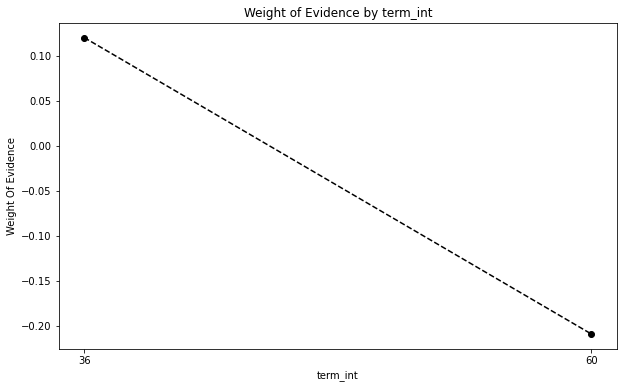

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
plot_by_woe(df_temp)

The above chart shows that 60 month loans are riskier than 36 month loans.The only thing we can do is keep two categories or dummy variables for the term in the final model; 36 and 60 months.Naturally the 60 month category will be the reference category.

In [ ]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

### Preprocessing employment length variable.

In [ ]:
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [ ]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,58157,0.987688,0.138109,57441.0,716.0,0.137816,0.166550,-0.189379,NaN,NaN,0.022312
1,1.0,27473,0.987515,0.065242,27130.0,343.0,0.065092,0.079786,-0.203547,0.000173,0.014168,0.022312
2,2.0,37497,0.990266,0.089047,37132.0,365.0,0.089089,0.084903,0.048125,0.002751,0.251672,0.022312
3,3.0,33430,0.990278,0.079388,33105.0,325.0,0.079428,0.075599,0.049402,0.000012,0.001277,0.022312
4,4.0,24506,0.988452,0.058196,24223.0,283.0,0.058117,0.065829,-0.124601,0.001826,0.174003,0.022312
5,5.0,24930,0.988809,0.059203,24651.0,279.0,0.059144,0.064899,-0.092851,0.000357,0.031750,0.022312
6,6.0,16838,0.988894,0.039986,16651.0,187.0,0.039950,0.043498,-0.085095,0.000086,0.007756,0.022312
7,7.0,18414,0.988650,0.043729,18205.0,209.0,0.043679,0.048616,-0.107095,0.000244,0.022000,0.022312
8,8.0,21560,0.990816,0.051200,21362.0,198.0,0.051253,0.046057,0.106890,0.002166,0.213985,0.022312
9,9.0,16769,0.988789,0.039822,16581.0,188.0,0.039782,0.043731,-0.094641,0.002027,0.201531,0.022312


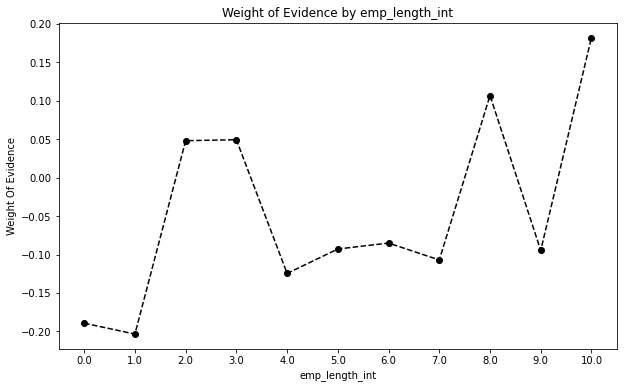

In [ ]:
plot_by_woe(df_temp)


Based on how the weight of evidence changes with employment length we can easily determine the categories for the PD model.There is more than one correct way to bundle them up but I'll show you the one I would choose.

1. The first category will be borrowers with zero year employment length.
2. The second category with one year employment length. 
3. You can see that weight of evidence hardly changes for employment length from 2 to 4 years.So that will be our third category.
4. Apparently weight of evidence is much lower for five years and almost the same between 5 and 6 years.So in the next category we can group employment length from 5 to 6 years.
5. Weight of evidence for 7 years is significantly higher compared to that for 6 years.Weight of evidence for 8 years is somewhat higher than for 7 but then the value for 9 years is almost equal to the one for 7.So it is not a bad idea to put employment length from 7 to 9 years in one category.
6. Alternatively we could create 3 different categories but normally we prefer fewer dummies.Finally employment length of 10 years or above most definitely belongs in a separate category as its weight of evidence is much higher compared to the rest of the categories.Moreover the number of observations falling into that category is about one third of all observations.
7. To finish the analysis of this variable we determine the riskiest group borrowers with zero years of employment are riskiest.So zero will be the reference category for the model.


In [ ]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

### Preprocesing the variable months since issue date.

We created it from the issue date of the loans available originally.This variable has about 90 distinct integer values on the one hand.These are not that many distinct values so we could easily treat them as categories and visualize them.In my opinion we can visualize everything with 100 or fewer categories and still make sense of it without getting lost.On the other hand it's much neater to work with less than 50 fine class categories when doing course classing.
1. Fine Classing:-Roughly grouping the values into categories.
2. Coarse Classing:-Determining final categories,combining few of the initial fine classing categories into bigger categories if needed.

In [ ]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [ ]:
df_inputs_prepr['mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mths_since_issue_d'],50)
df_inputs_prepr['mths_since_issue_d_factor']

0         (23.989, 24.22]
1         (23.989, 24.22]
2         (23.989, 24.22]
3         (23.989, 24.22]
4         (23.989, 24.22]
               ...       
421089      (34.78, 35.0]
421090      (34.78, 35.0]
421091      (34.78, 35.0]
421092      (34.78, 35.0]
421093      (34.78, 35.0]
Name: mths_since_issue_d_factor, Length: 421094, dtype: category
Categories (50, interval[float64]): [(23.989, 24.22] < (24.22, 24.44] < (24.44, 24.66] <
                                     (24.66, 24.88] ... (34.12, 34.34] < (34.34, 34.56] <
                                     (34.56, 34.78] < (34.78, 35.0]]

In [ ]:
df_temp= woe_ordered_continuous(df_inputs_prepr,'mths_since_issue_d_factor',df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(23.989, 24.22]",44342,0.999436,0.105302,44317.0,25.0,0.106328,0.005815,2.906036,NaN,NaN,1.184832
1,"(24.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
2,"(24.44, 24.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
3,"(24.66, 24.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
4,"(24.88, 25.1]",37530,0.998375,0.089125,37469.0,61.0,0.089898,0.014189,1.846183,NaN,NaN,1.184832
5,"(25.1, 25.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
6,"(25.32, 25.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
7,"(25.54, 25.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
8,"(25.76, 25.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184832
9,"(25.98, 26.2]",48631,0.998190,0.115487,48543.0,88.0,0.116467,0.020470,1.738656,NaN,NaN,1.184832


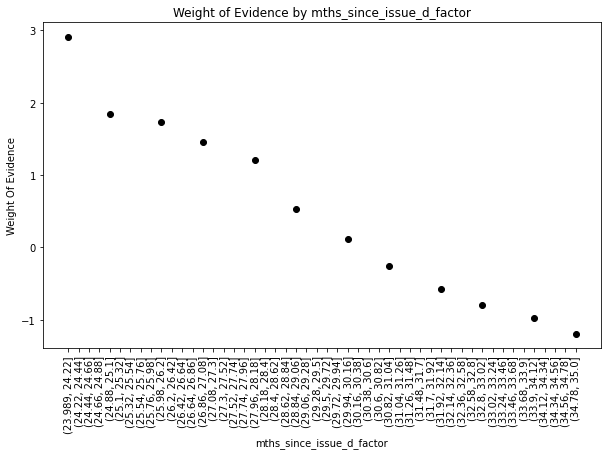

In [ ]:
plot_by_woe(df_temp,90)

Interpretation from WOE chart
1. We can start course classing the variabl. The first the second and the third categories differ significantly in terms of weight of evidence from one another and from the following categories.Let's keep each of them as categories for the final model.Remember that the months since issue date variable takes integer values only.That means we can specify the limits of the dummy variables we create using only integer numbers.So for the first three categories we have one dummy variable **for months since issue date lower than 38**,another variable for months since issue day **between 38 and thirty nine months** and another variable for months since issue date **between 40 and 41**.These categories have rather high weights of evidence compared to the weights of evidence of most other categories.
2. The first four categories on the next graph have higher weights of evidence from the rest and their weight of evidence aren't that different.Let's create one dummy variable for all of them.So this dummy variable will be **from 42 to 48 months**.
3. Next we can group the next two categories together in one dummy variable **from 49 to 52 months**.
4. The seven following categories have similar weight of evidence so we can group them in the one dummy variable from **53 to 64 months** since issue date 
5. If you remember apart from the weight of evidence value, sanother important determinant was the number of observations that fall into a given category.If we check out the remaining categories we can notice that they contain a very small number of observations altogether.In fact this is the reason why their weights of evidence vary a lot.So even if you have forgotten to check the number of observations that fall into each category such a plot can serve as a red flag for you whenever you see a WOE plot that goes up and down like this you must make sure to check the number of observations in the respective categories.
6. So we know that these intervals refer to only a small portion of our data.
Therefore we could create only one dummy variable for all of them.That is one way to deal with it.However I prefer to cut here at **84 months** since issue day so there will be one dummy variable for **65 to 84 months** since issue date and another one for more than **84 months** since issue date. 


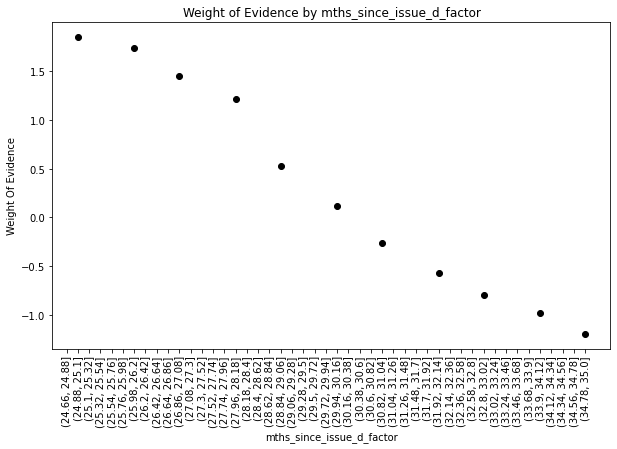

In [ ]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [ ]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

### Preprocessing the interest rate variable.

In [ ]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(5.296, 5.793]",9651,0.999378,0.022919,9645.0,6.0,0.023141,0.001396,2.808223,NaN,NaN,inf
1,"(5.793, 6.267]",10214,0.998531,0.024256,10199.0,15.0,0.024470,0.003489,1.947783,0.000847,0.860441,inf
2,"(6.267, 6.74]",6530,0.996325,0.015507,6506.0,24.0,0.015610,0.005583,1.028214,0.002207,0.919568,inf
3,"(6.74, 7.214]",12488,0.997117,0.029656,12452.0,36.0,0.029876,0.008374,1.271906,0.000793,0.243691,inf
4,"(7.214, 7.687]",11416,0.998160,0.027110,11395.0,21.0,0.027340,0.004885,1.722195,0.001043,0.450290,inf
5,"(7.687, 8.16]",20636,0.997286,0.049006,20580.0,56.0,0.049377,0.013026,1.332511,0.000874,0.389684,inf
6,"(8.16, 8.634]",22498,0.996355,0.053428,22416.0,82.0,0.053782,0.019074,1.036599,0.000931,0.295912,inf
7,"(8.634, 9.107]",2020,0.988614,0.004797,1997.0,23.0,0.004791,0.005350,-0.110305,0.007741,1.146904,inf
8,"(9.107, 9.581]",22171,0.996527,0.052651,22094.0,77.0,0.053009,0.017911,1.085044,0.007913,1.195349,inf
9,"(9.581, 10.054]",22364,0.996959,0.053109,22296.0,68.0,0.053494,0.015818,1.218443,0.000432,0.133399,inf


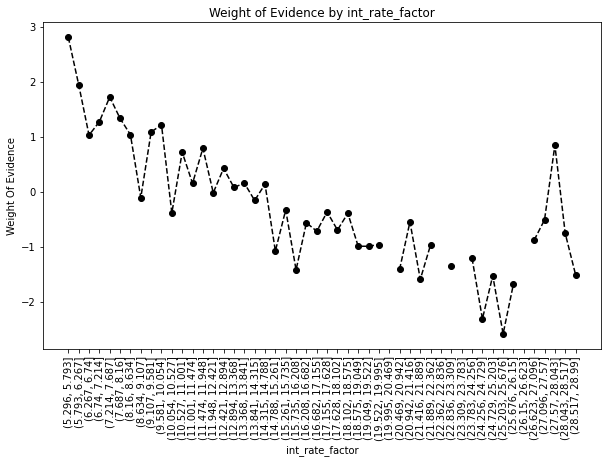

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

As we can see on the graph the relationship between interest rate and weight of evidence is almost monotonic.
1. The greater the interest rate the lower the weight of evidence and the higher the probability of default.
2. The presence of a monotonic relationship makes it somehow easier to determine the boundaries of the intervals.It doesn't matter as much where they are as the next interval is almost certainly going to have lower weight of evidence than the previous.
3. Let's bundle them up.The numerous ups and downs in the first 10 observations that the graph points us to look at the number of their observations.Weight of evidence is somewhat higher for them but they don't have too many observations.
So let's bundle them in one dummy.The cutoff point between the 10th and the 11th category is 9.548.So the first dummy variable will include observations with interest rate lower than or equal to 9.548%.
4. Then weight of evidence decreases more significantly here at 12.025%
Therefore the second dummy variable will be for observations with interest rate greater than 9.548% and lower than or equal to 12.025%.
5. The next point where weight of evidence differ significantly compared to the previous categories is here at 15.74%.So the next dummy variable will be for everything greater than 12.025% and lower than or equal to 15.74%.
6. The next kind of point is a 20.281%.Accordingly the next dummy variable will be for everything greater than 15.74% and lower than or equal to 20.281%.
7. We can't really say that there are such big differences in weights of evidence after 20.281%.Besides each of these categories has a rather low number of observations so it makes sense to group them in one dummy everything greater than 20.281% 

In [ ]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

### Preprocessing the funded_amnt

In [ ]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(966.0, 1680.0]",3391,0.988794,0.008053,3353.0,38.0,0.008045,0.008839,-0.094187,NaN,NaN,0.030597
1,"(1680.0, 2360.0]",3751,0.990136,0.008908,3714.0,37.0,0.008911,0.008607,0.034735,0.001342,0.128922,0.030597
2,"(2360.0, 3040.0]",8134,0.988444,0.019316,8040.0,94.0,0.019290,0.021866,-0.125322,0.001692,0.160057,0.030597
3,"(3040.0, 3720.0]",5133,0.990454,0.012190,5084.0,49.0,0.012198,0.011398,0.067821,0.002010,0.193144,0.030597
4,"(3720.0, 4400.0]",7315,0.987286,0.017371,7222.0,93.0,0.017327,0.021633,-0.221924,0.003168,0.289746,0.030597
5,"(4400.0, 5080.0]",18150,0.989587,0.043102,17961.0,189.0,0.043093,0.043964,-0.020001,0.002300,0.201923,0.030597
6,"(5080.0, 5760.0]",5617,0.991989,0.013339,5572.0,45.0,0.013369,0.010468,0.244635,0.002402,0.264636,0.030597
7,"(5760.0, 6440.0]",16224,0.989275,0.038528,16050.0,174.0,0.038508,0.040475,-0.049803,0.002713,0.294438,0.030597
8,"(6440.0, 7120.0]",10565,0.990156,0.025089,10461.0,104.0,0.025099,0.024192,0.036806,0.000881,0.086610,0.030597
9,"(7120.0, 7800.0]",8423,0.989909,0.020003,8338.0,85.0,0.020005,0.019772,0.011715,0.000248,0.025091,0.030597


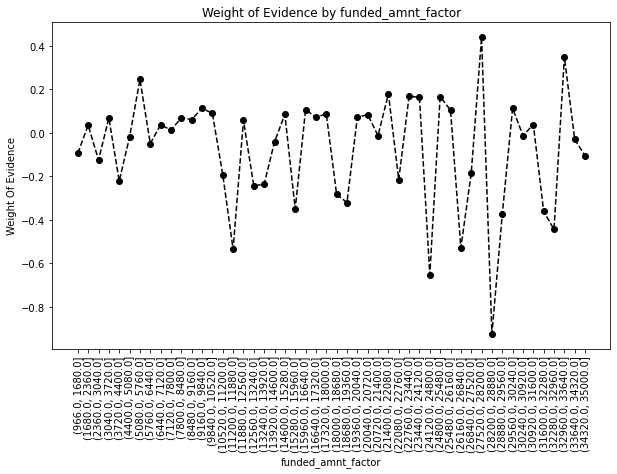

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

1. The chart shows the consecutive intervals of the variable have very different weights of evidence at the same time.It seems that all of these variations are around a trend that is almost horizontal.
2. There is no other clear pattern of dependence between the independent variable and weight of evidence.In other words weight of evidence varies greatly and there seems to be no association whatsoever with the independent variable.This is sufficient reason to make the decision not to use the funded amount variable in our PD model.

So there will be no need for us to create dummy variables.

### Preprocessing the mnths_since_earliest_cr_line

In [ ]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(60.474, 71.52]",2001,0.994003,0.004752,1989.0,12.0,0.004772,0.002791,0.536269,NaN,NaN,inf
1,"(71.52, 82.04]",4886,0.987311,0.011603,4824.0,62.0,0.011574,0.014422,-0.219988,0.006692,0.756256,inf
2,"(82.04, 92.56]",4610,0.985033,0.010948,4541.0,69.0,0.010895,0.016050,-0.387416,0.002278,0.167428,inf
3,"(92.56, 103.08]",5446,0.986228,0.012933,5371.0,75.0,0.012886,0.017446,-0.302931,0.001196,0.084485,inf
4,"(103.08, 113.6]",6146,0.985519,0.014595,6057.0,89.0,0.014532,0.020702,-0.353879,0.000709,0.050948,inf
5,"(113.6, 124.12]",10200,0.986863,0.024223,10066.0,134.0,0.024151,0.031170,-0.255133,0.001344,0.098745,inf
6,"(124.12, 134.64]",11155,0.985477,0.026491,10993.0,162.0,0.026375,0.037683,-0.356794,0.001385,0.101661,inf
7,"(134.64, 145.16]",15641,0.986957,0.037144,15437.0,204.0,0.037037,0.047453,-0.247810,0.001480,0.108985,inf
8,"(145.16, 155.68]",18480,0.988961,0.043886,18276.0,204.0,0.043849,0.047453,-0.078988,0.002004,0.168821,inf
9,"(155.68, 166.2]",24374,0.988102,0.057883,24084.0,290.0,0.057784,0.067458,-0.154790,0.000859,0.075802,inf


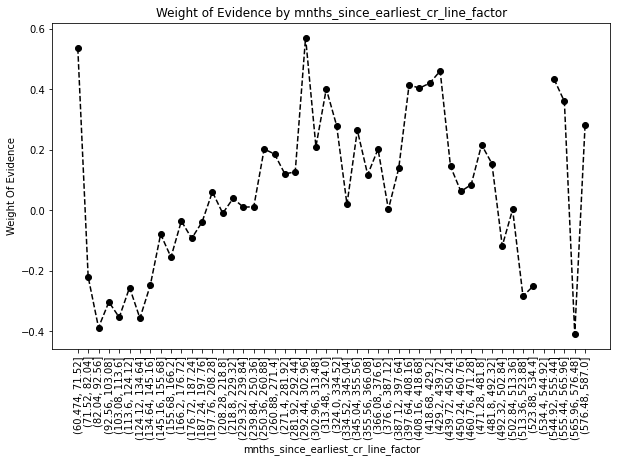

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

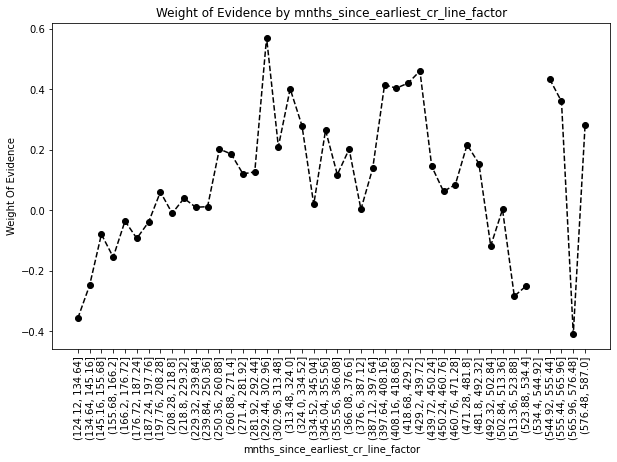

In [ ]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [ ]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mnths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mnths_since_earliest_cr_line'].max()))), 1, 0)

### Preprocesing the delinq_2yrs

In [ ]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,334007,0.989904,0.793189,330635.0,3372.0,0.793280,0.784368,0.011297,NaN,NaN,inf
1,1.0,57000,0.989825,0.135362,56420.0,580.0,0.135366,0.134915,0.003339,0.000080,0.007958,inf
2,2.0,17241,0.989212,0.040943,17055.0,186.0,0.040919,0.043266,-0.055760,0.000613,0.059099,inf
3,3.0,6293,0.989035,0.014944,6224.0,69.0,0.014933,0.016050,-0.072150,0.000176,0.016390,inf
4,4.0,2949,0.985080,0.007003,2905.0,44.0,0.006970,0.010235,-0.384213,0.003956,0.312063,inf
5,5.0,1475,0.985763,0.003503,1454.0,21.0,0.003489,0.004885,-0.336661,0.000683,0.047552,inf
6,6.0,842,0.986936,0.002000,831.0,11.0,0.001994,0.002559,-0.249478,0.001173,0.087183,inf
7,7.0,438,0.988584,0.001040,433.0,5.0,0.001039,0.001163,-0.112912,0.001649,0.136565,inf
8,8.0,284,0.989437,0.000674,281.0,3.0,0.000674,0.000698,-0.034470,0.000852,0.078443,inf
9,9.0,173,0.988439,0.000411,171.0,2.0,0.000410,0.000465,-0.125696,0.000997,0.091226,inf


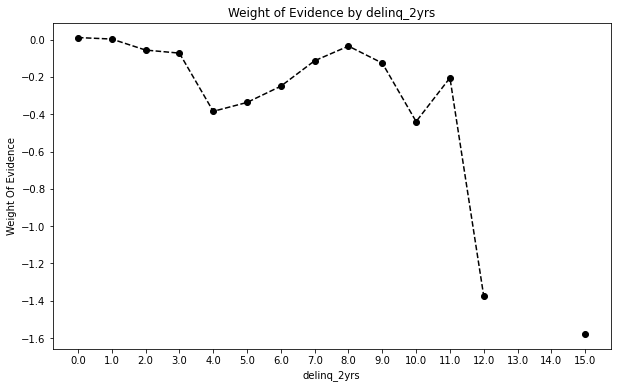

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

### Preprocessing the inq_last_6mths

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,256407,0.991615,0.608907,254257.0,2150.0,0.610029,0.500116,0.198666,NaN,NaN,inf
1,1.0,111346,0.988298,0.264421,110043.0,1303.0,0.264022,0.303094,-0.138010,0.003317,0.336676,inf
2,2.0,36292,0.985176,0.086185,35754.0,538.0,0.085783,0.125145,-0.377653,0.003122,0.239643,inf
3,3.0,12272,0.980769,0.029143,12036.0,236.0,0.028878,0.054896,-0.642386,0.004407,0.264733,inf
4,4.0,3517,0.986068,0.008352,3468.0,49.0,0.008321,0.011398,-0.314699,0.005298,0.327687,inf
5,5.0,1217,0.981101,0.002890,1194.0,23.0,0.002865,0.005350,-0.624642,0.004967,0.309943,inf
6,6.0,43,1.000000,0.000102,43.0,0.0,0.000103,0.000000,inf,0.018899,inf,inf


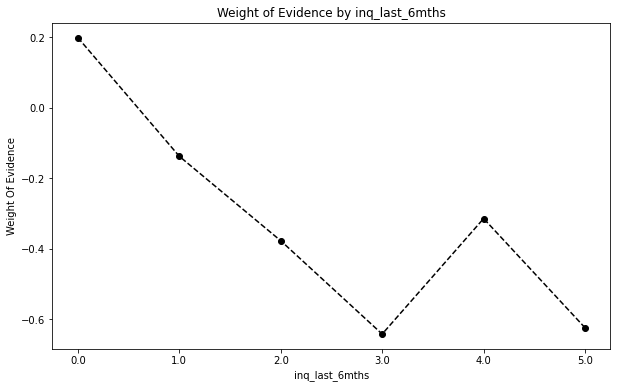

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### Preprocessing the 'open_acc' 

In [ ]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,1.0,90,0.988889,0.000214,89.0,1.0,0.000214,0.000233,-0.085576,NaN,NaN,inf
1,2.0,986,0.984787,0.002342,971.0,15.0,0.002330,0.003489,-0.403936,0.004102,0.318360,inf
2,3.0,4119,0.990046,0.009782,4078.0,41.0,0.009784,0.009537,0.025578,0.005259,0.429514,inf
3,4.0,10779,0.989424,0.025598,10665.0,114.0,0.025588,0.026518,-0.035688,0.000622,0.061266,inf
4,5.0,18222,0.989463,0.043273,18030.0,192.0,0.043259,0.044662,-0.031915,0.000039,0.003773,inf
5,6.0,25117,0.988892,0.059647,24838.0,279.0,0.059593,0.064899,-0.085294,0.000571,0.053379,inf
6,7.0,30294,0.989404,0.071941,29973.0,321.0,0.071913,0.074669,-0.037601,0.000512,0.047693,inf
7,8.0,34685,0.989217,0.082369,34311.0,374.0,0.082321,0.086997,-0.055247,0.000187,0.017646,inf
8,9.0,36266,0.990239,0.086123,35912.0,354.0,0.086162,0.082345,0.045318,0.001022,0.100564,inf
9,10.0,35809,0.989388,0.085038,35429.0,380.0,0.085003,0.088393,-0.039097,0.000851,0.084415,inf


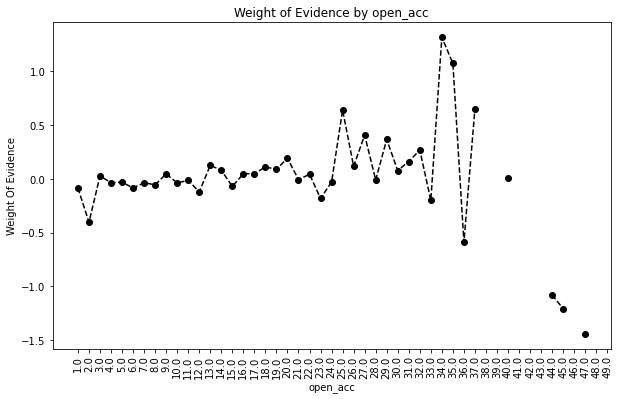

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

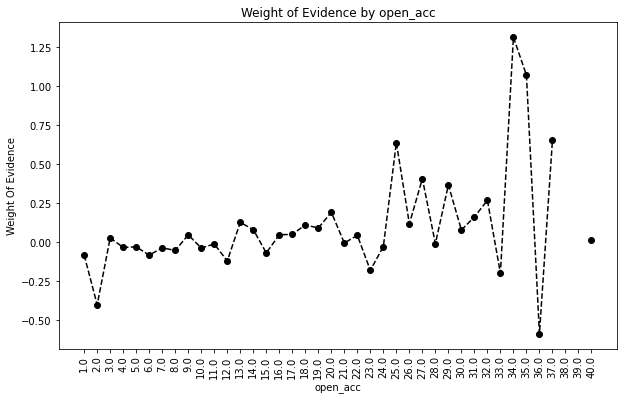

In [ ]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### Processing the 'pub_rec'.

In [ ]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,346679,0.989907,0.823282,343180.0,3499.0,0.823378,0.813910,0.011566,NaN,NaN,inf
1,1.0,60215,0.989106,0.142997,59559.0,656.0,0.142898,0.152594,-0.065650,0.000801,0.077216,inf
2,2.0,9230,0.990141,0.021919,9139.0,91.0,0.021927,0.021168,0.035235,0.001035,0.100885,inf
3,3.0,2876,0.988526,0.006830,2843.0,33.0,0.006821,0.007676,-0.118105,0.001615,0.153339,inf
4,4.0,1044,0.990421,0.002479,1034.0,10.0,0.002481,0.002326,0.064393,0.001896,0.182497,inf
5,5.0,481,0.987526,0.001142,475.0,6.0,0.001140,0.001396,-0.202657,0.002895,0.267050,inf
6,6.0,249,0.991968,0.000591,247.0,2.0,0.000593,0.000465,0.242029,0.004442,0.444686,inf
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000259,0.000000,inf,0.008032,inf,inf
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000202,0.000000,inf,0.000000,NaN,inf
9,9.0,34,1.000000,0.000081,34.0,0.0,0.000082,0.000000,inf,0.000000,NaN,inf


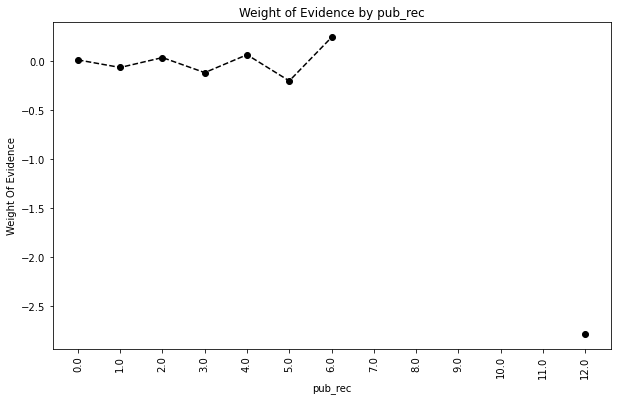

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

### Preprocessing the 'total_acc'

In [ ]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(3.835, 7.3]",11333,0.988529,0.026913,11203.0,130.0,0.026879,0.030240,-0.117810,NaN,NaN,inf
1,"(7.3, 10.6]",21005,0.988003,0.049882,20753.0,252.0,0.049792,0.058618,-0.163195,0.000526,0.045385,inf
2,"(10.6, 13.9]",31446,0.989188,0.074677,31106.0,340.0,0.074631,0.079088,-0.058002,0.001185,0.105193,inf
3,"(13.9, 17.2]",53180,0.989752,0.126290,52635.0,545.0,0.126285,0.126774,-0.003861,0.000564,0.054140,inf
4,"(17.2, 20.5]",44528,0.989782,0.105744,44073.0,455.0,0.105743,0.105839,-0.000907,0.000030,0.002954,inf
5,"(20.5, 23.8]",44749,0.989162,0.106268,44264.0,485.0,0.106201,0.112817,-0.060434,0.000620,0.059527,inf
6,"(23.8, 27.1]",55586,0.990087,0.132004,55035.0,551.0,0.132043,0.128169,0.029778,0.000926,0.090212,inf
7,"(27.1, 30.4]",35493,0.991069,0.084288,35176.0,317.0,0.084396,0.073738,0.135005,0.000981,0.105228,inf
8,"(30.4, 33.7]",29540,0.990318,0.070151,29254.0,286.0,0.070188,0.066527,0.053568,0.000750,0.081438,inf
9,"(33.7, 37.0]",30463,0.990546,0.072343,30175.0,288.0,0.072398,0.066992,0.077597,0.000228,0.024029,inf


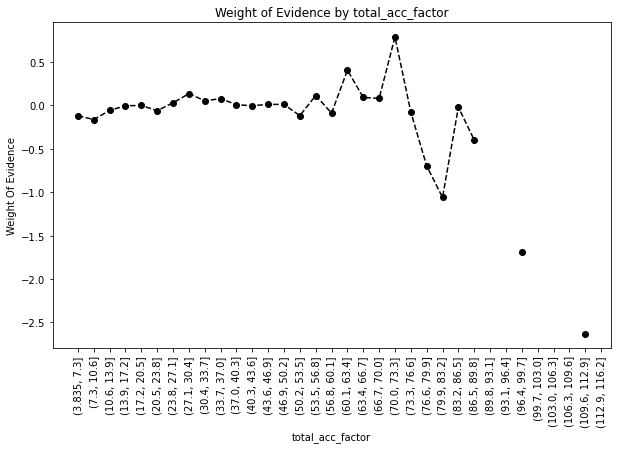

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

### Preprocessing the 'acc_now_delinq'

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,418712,0.989819,0.994343,414449.0,4263.0,0.994371,0.991626,0.002765,NaN,NaN,inf
1,1.0,2243,0.985288,0.005327,2210.0,33.0,0.005302,0.007676,-0.369972,0.004531,0.372737,inf
2,2.0,116,0.974138,0.000275,113.0,3.0,0.000271,0.000698,-0.945437,0.011150,0.575465,inf
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,0.025862,inf,inf
4,4.0,3,1.000000,0.000007,3.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


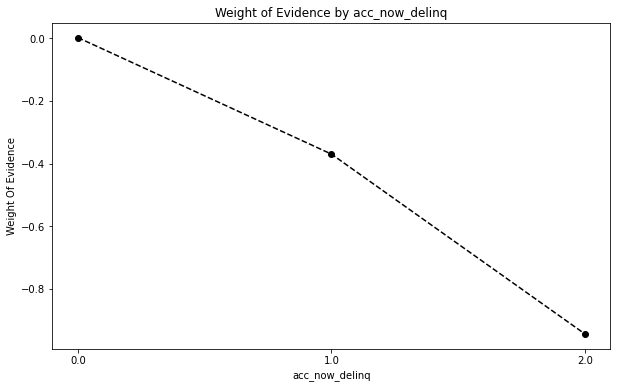

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### Preprocessing the 'total_rev_hi_lim'

In [ ]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9999.999, 5000.0]",12981,0.983052,0.030827,12761.0,220.0,0.030617,0.051175,-0.513691,NaN,NaN,inf
1,"(5000.0, 9999.999]",42858,0.985674,0.101778,42244.0,614.0,0.101354,0.142824,-0.342989,0.002621,0.170701,inf
2,"(9999.999, 14999.998]",56173,0.988446,0.133398,55524.0,649.0,0.133217,0.150965,-0.125074,0.002773,0.217915,inf
3,"(14999.998, 19999.998]",54873,0.989066,0.130311,54273.0,600.0,0.130215,0.139567,-0.069360,0.000619,0.055715,inf
4,"(19999.998, 24999.997]",46739,0.990415,0.110994,46291.0,448.0,0.111064,0.104210,0.063698,0.001349,0.133057,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


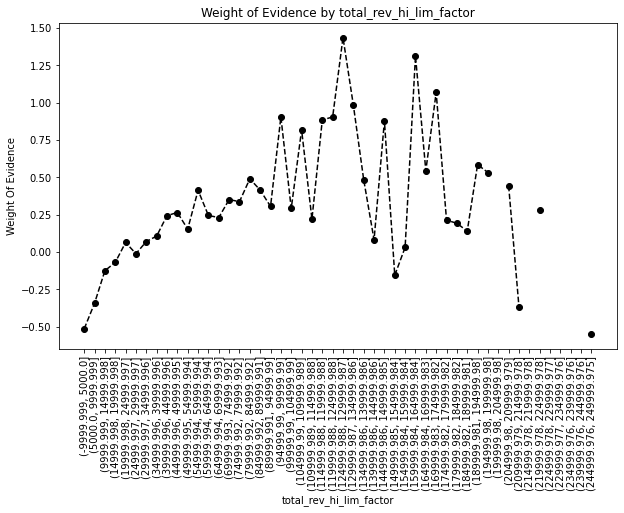

In [ ]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [ ]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### Preprocessing the 'installment'

In [ ]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(28.705, 58.427]",3506,0.989161,0.008326,3468.0,38.0,0.008321,0.008839,-0.060465,NaN,NaN,0.041136
1,"(58.427, 86.734]",5832,0.990055,0.013850,5774.0,58.0,0.013853,0.013492,0.026465,0.000893,0.086930,0.041136
2,"(86.734, 115.04]",8123,0.989413,0.019290,8037.0,86.0,0.019283,0.020005,-0.036748,0.000642,0.063213,0.041136
3,"(115.04, 143.347]",9139,0.989167,0.021703,9040.0,99.0,0.021689,0.023029,-0.059917,0.000245,0.023169,0.041136
4,"(143.347, 171.654]",17953,0.990921,0.042634,17790.0,163.0,0.042683,0.037916,0.118430,0.001753,0.178347,0.041136
5,"(171.654, 199.961]",15515,0.991557,0.036845,15384.0,131.0,0.036910,0.030472,0.191674,0.000636,0.073244,0.041136
6,"(199.961, 228.268]",16515,0.989222,0.039219,16337.0,178.0,0.039197,0.041405,-0.054808,0.002335,0.246482,0.041136
7,"(228.268, 256.574]",22043,0.991925,0.052347,21865.0,178.0,0.052460,0.041405,0.236647,0.002703,0.291455,0.041136
8,"(256.574, 284.881]",25323,0.989733,0.060136,25063.0,260.0,0.060133,0.060479,-0.005746,0.002192,0.242393,0.041136
9,"(284.881, 313.188]",24135,0.989476,0.057315,23881.0,254.0,0.057297,0.059084,-0.030708,0.000257,0.024962,0.041136


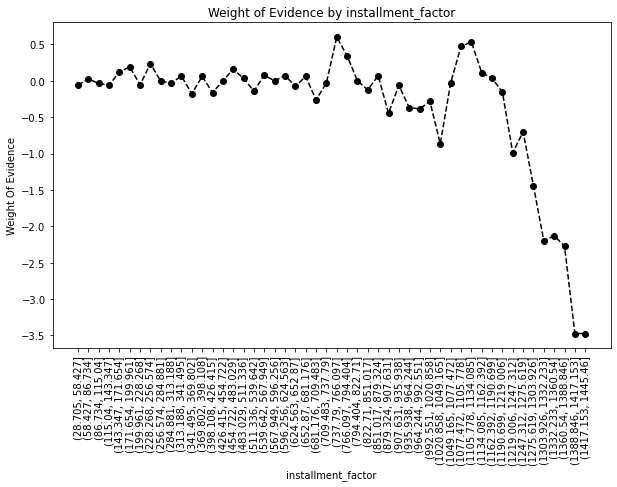

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Precprocessing the 'annual income'

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9500.0, 190000.0]",409693,0.989731,0.972925,405486.0,4207.0,0.972867,0.978600,-0.005876,NaN,NaN,inf
1,"(190000.0, 380000.0]",10007,0.991406,0.023764,9921.0,86.0,0.023803,0.020005,0.173850,0.001675,0.179725,inf
2,"(380000.0, 570000.0]",943,0.996819,0.002239,940.0,3.0,0.002255,0.000698,1.173056,0.005413,0.999206,inf
3,"(570000.0, 760000.0]",257,0.996109,0.000610,256.0,1.0,0.000614,0.000233,0.970965,0.000710,0.202090,inf
4,"(760000.0, 950000.0]",70,1.000000,0.000166,70.0,0.0,0.000168,0.000000,inf,0.003891,inf,inf
5,"(950000.0, 1140000.0]",43,1.000000,0.000102,43.0,0.0,0.000103,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",20,0.950000,0.000047,19.0,1.0,0.000046,0.000233,-1.629773,0.050000,inf,inf
7,"(1330000.0, 1520000.0]",14,1.000000,0.000033,14.0,0.0,0.000034,0.000000,inf,0.050000,inf,inf
8,"(1520000.0, 1710000.0]",3,1.000000,0.000007,3.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000012,5.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf


1. What's immediately obvious though is that there is a very large number of observations in the first interval.
2. In fact the first interval contains more than ninety four percent of all observations.Therefore it seems like 50 categories were not quite enough to fine class the variable.In such cases we could try to split the variable into more than 50 classes let's say 100; we will use the same code this time indicating we prefer 100 categories.
3. Let's run all cells below until we reach the resulting data frame.It seems that things are a bit better but not much.Again the first category contains a very large number of observations this time about 62 percent of all observations.
4. If we apply common logic this is kind of expected.There are very few people with a large income and a lot of people with low income.Perhaps it's a good idea to put aside people with very high income and investigate people with lower
incomes separately.
5. So the first two categories from the last fine classing contain a lot of observations while each of the subsequent categories contains very few observations.So the number of observations becomes lower and lower as we go to categories with higher income.
6. Why don't we create one dummy variable for people with very large income now and figure out what dummy variables we have to create for people with lower income.Next let's do that.
7. The third category here starts from about one hundred forty four thousand dollars.Let's assume that one hundred forty thousand dollars are the threshold above which people are considered to have a high income.This way the category of people with very high income would include a bit more than 5 percent of the
observations.
8. So we'll create one category for people with income higher than one hundred and forty thousand dollars.Now let's look only at the remaining observations that is people with an annual income lower than or equal to one hundred forty thousand dollars.Let's store them temporarily in the data frame.

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9500.0, 95000.0]",325648,0.989123,0.773338,322106.0,3542.0,0.772816,0.823913,-0.064023,NaN,NaN,inf
1,"(95000.0, 190000.0]",84045,0.992088,0.199587,83380.0,665.0,0.200050,0.154687,0.257165,0.002964,0.321188,inf
2,"(190000.0, 285000.0]",8186,0.991449,0.019440,8116.0,70.0,0.019472,0.016283,0.178885,0.000639,0.078279,inf
3,"(285000.0, 380000.0]",1821,0.991214,0.004324,1805.0,16.0,0.004331,0.003722,0.151515,0.000235,0.027370,inf
4,"(380000.0, 475000.0]",652,0.995399,0.001548,649.0,3.0,0.001557,0.000698,0.802608,0.004185,0.651093,inf
5,"(475000.0, 570000.0]",291,1.000000,0.000691,291.0,0.0,0.000698,0.000000,inf,0.004601,inf,inf
6,"(570000.0, 665000.0]",165,0.993939,0.000392,164.0,1.0,0.000393,0.000233,0.525654,0.006061,inf,inf
7,"(665000.0, 760000.0]",92,1.000000,0.000218,92.0,0.0,0.000221,0.000000,inf,0.006061,inf,inf
8,"(760000.0, 855000.0]",46,1.000000,0.000109,46.0,0.0,0.000110,0.000000,inf,0.000000,NaN,inf
9,"(855000.0, 950000.0]",24,1.000000,0.000057,24.0,0.0,0.000058,0.000000,inf,0.000000,NaN,inf


In [ ]:
#Storing observations with an annual income lower than or equal to 140000 dollars
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000,:]

In [ ]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'] ,50)
df_temp=woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-140.0, 2800.0]",4,1.000000,0.000010,4.0,0.0,0.000010,0.000000,inf,NaN,NaN,inf
1,"(2800.0, 5600.0]",12,1.000000,0.000031,12.0,0.0,0.000031,0.000000,inf,0.000000,NaN,inf
2,"(5600.0, 8400.0]",55,0.981818,0.000141,54.0,1.0,0.000140,0.000245,-0.564030,0.018182,inf,inf
3,"(8400.0, 11200.0]",429,0.986014,0.001097,423.0,6.0,0.001093,0.001472,-0.297401,0.004196,0.266629,inf
4,"(11200.0, 14000.0]",873,0.986254,0.002233,861.0,12.0,0.002225,0.002944,-0.279826,0.000240,0.017575,inf
5,"(14000.0, 16800.0]",1339,0.988798,0.003425,1324.0,15.0,0.003422,0.003680,-0.072651,0.002543,0.207175,inf
6,"(16800.0, 19600.0]",1808,0.986173,0.004624,1783.0,25.0,0.004609,0.006133,-0.285837,0.002625,0.213186,inf
7,"(19600.0, 22400.0]",3823,0.987444,0.009778,3775.0,48.0,0.009757,0.011776,-0.188059,0.001272,0.097778,inf
8,"(22400.0, 25200.0]",6445,0.984794,0.016485,6347.0,98.0,0.016405,0.024043,-0.382244,0.002650,0.194185,inf
9,"(25200.0, 28000.0]",5904,0.984925,0.015101,5815.0,89.0,0.015030,0.021835,-0.373454,0.000131,0.008790,inf


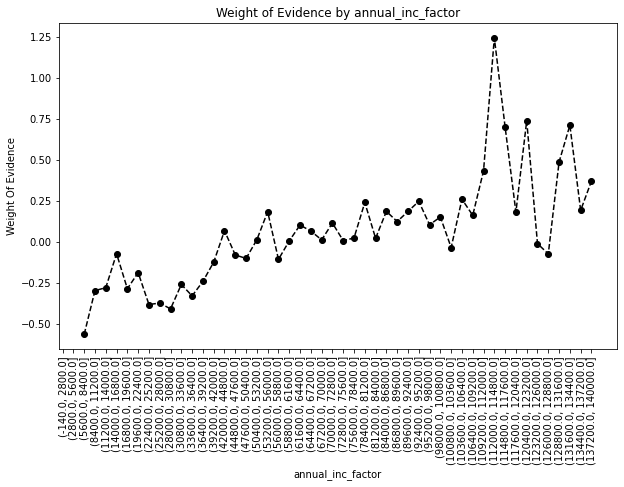

In [ ]:
plot_by_woe(df_temp,90)

1. What we see here is the weight of evidence increases almost monotonously with annual income.Remember the case for the interest rate variable from the last lecture was similar but in the opposite direction.

2. Weight of evidence decreased monotonously as interest rate increased.Well here it seems that the relationship is even more monotonous.Thus we can safely split the variable into some roughly equal intervals.Of course we have to take into consideration the number of observations as well.

3. For example we can split the whole interval from 0 to 140000 to intervals with width 10000.But the first two such intervals would have very few observations each.SO let the first interval be from 0 to 20000 or lower than or equal to 20000.

4. If we kept everything split with  10000 the last four intervals from 100000 to 140000 would also have a very low number of observations each. 

5. With that in mind Let's make two intervals from 100000 to 120000 and from 120000 to 140000.

6. Now what's left is everything between 20000 and 100000. We will split it into equally wide categories with a width of ten thousand each.

7. In other words we'll have eight equally wide categories here.First from 20000 to 30000 then from 30000 to 40000 and so on until 90000 to 100000.

8. To sum up for the annual income category we have one category for annual income <=20000,eight categories with ten thousand each from 20000 to 100000 ,one category from 100000 to 120000, one category from 120000 to 140000 and one category for annual income greater than 140000.

In [ ]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### Preprocessing 'mnths_since_last_delinq'.
1. Let's explore months since last delinquency.If you remember from the initial pre processing we've done there are a lot of missing values in this variable;in fact so many that we've determined we couldn't do anything with them at that stage.
2. Well every continuous variable is represented by dummy variables in the probability of default model and months since last delinquency should be no exception.Of course besides the missing values the variable takes integer numbers values greater than 0.
3. We already have a lot of experience with fine classing and coarse classing such variables into dummy variables.But what should we do with the missing values.Well why not just create a dummy variable for missing months since last delinquency?
4. This variable can have a value of 1 when months since last delinquency is missing and value of 0 when it isn't missing.
5. Then when it is not missing the rest of the dummy variables will cover all the values after we do fine classing and course classing.Note that this methodology for dealing with missing values can only be used with categorical variables.
6. All right we've made the decision to create a separate dummy variable for the missing values and thus we can continue with fine classing and course classing of all non missing values.

In [ ]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.176, 3.52]",7261,0.985815,0.033440,7158.0,103.0,0.033303,0.046882,-0.341991,NaN,NaN,inf
1,"(3.52, 7.04]",15763,0.990230,0.072596,15609.0,154.0,0.072622,0.070096,0.035403,0.004416,0.377393,inf
2,"(7.04, 10.56]",12365,0.991427,0.056947,12259.0,106.0,0.057036,0.048248,0.167329,0.001197,0.131926,inf
3,"(10.56, 14.08]",16125,0.989085,0.074263,15949.0,176.0,0.074203,0.080109,-0.076580,0.002342,0.243909,inf
4,"(14.08, 17.6]",11384,0.986033,0.052429,11225.0,159.0,0.052225,0.072371,-0.326253,0.003052,0.249673,inf
5,"(17.6, 21.12]",14291,0.989714,0.065817,14144.0,147.0,0.065806,0.066909,-0.016634,0.003681,0.309619,inf
6,"(21.12, 24.64]",10544,0.990231,0.048560,10441.0,103.0,0.048577,0.046882,0.035519,0.000518,0.052153,inf
7,"(24.64, 28.16]",13761,0.990408,0.063376,13629.0,132.0,0.063410,0.060082,0.053906,0.000176,0.018387,inf
8,"(28.16, 31.68]",9867,0.991994,0.045442,9788.0,79.0,0.045539,0.035958,0.236217,0.001586,0.182311,inf
9,"(31.68, 35.2]",12583,0.991258,0.057951,12473.0,110.0,0.058031,0.050068,0.147594,0.000735,0.088623,inf


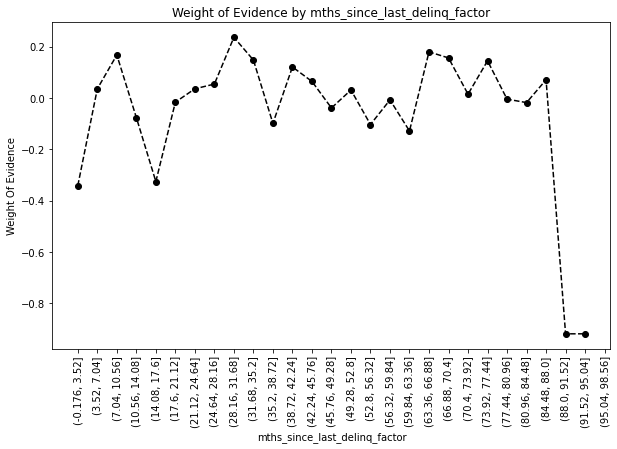

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing the 'dti' variable.

In [ ]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9.999, 99.99]",421083,0.989791,0.999974,416784.0,4299.0,0.999974,1.0,-0.000026,NaN,NaN,inf
1,"(99.99, 199.98]",6,1.000000,0.000014,6.0,0.0,0.000014,0.0,inf,0.010209,inf,inf
2,"(199.98, 299.97]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(299.97, 399.96]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
4,"(399.96, 499.95]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(499.95, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(599.94, 699.93]",1,1.000000,0.000002,1.0,0.0,0.000002,0.0,inf,NaN,NaN,inf
7,"(699.93, 799.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(799.92, 899.91]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(899.91, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


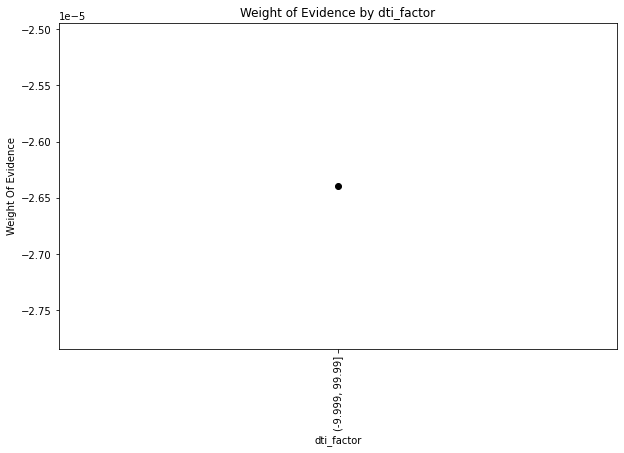

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [ ]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.035, 0.7]",707,0.981612,0.001749,694.0,13.0,0.001734,0.003228,-0.621280,NaN,NaN,0.050635
1,"(0.7, 1.4]",1116,0.985663,0.002761,1100.0,16.0,0.002749,0.003973,-0.368326,0.004051,0.252954,0.050635
2,"(1.4, 2.1]",1596,0.992481,0.003949,1584.0,12.0,0.003959,0.002980,0.283999,0.006818,0.652325,0.050635
3,"(2.1, 2.8]",2140,0.991121,0.005295,2121.0,19.0,0.005301,0.004718,0.116401,0.001360,0.167598,0.050635
4,"(2.8, 3.5]",2873,0.987121,0.007108,2836.0,37.0,0.007087,0.009188,-0.259571,0.004000,0.375972,0.050635
5,"(3.5, 4.2]",3342,0.994016,0.008269,3322.0,20.0,0.008302,0.004966,0.513787,0.006894,0.773358,0.050635
6,"(4.2, 4.9]",3963,0.991421,0.009805,3929.0,34.0,0.009819,0.008443,0.150977,0.002595,0.362810,0.050635
7,"(4.9, 5.6]",4945,0.993731,0.012235,4914.0,31.0,0.012281,0.007698,0.467054,0.002310,0.316077,0.050635
8,"(5.6, 6.3]",5600,0.991071,0.013856,5550.0,50.0,0.013870,0.012416,0.110727,0.002660,0.356326,0.050635
9,"(6.3, 7.0]",6101,0.992952,0.015095,6058.0,43.0,0.015140,0.010678,0.349132,0.001881,0.238405,0.050635


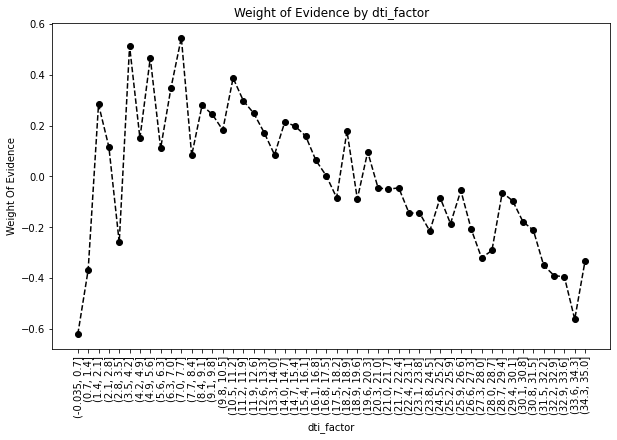

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

### Preprocessing the 'mths_since_last_record ' variable

In [ ]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.12, 2.4]",87,1.000000,0.001169,87.0,0.0,0.001182,0.00000,inf,NaN,NaN,inf
1,"(2.4, 4.8]",161,1.000000,0.002164,161.0,0.0,0.002187,0.00000,inf,0.000000,NaN,inf
2,"(4.8, 7.2]",344,0.985465,0.004623,339.0,5.0,0.004605,0.00625,-0.305430,0.014535,inf,inf
3,"(7.2, 9.6]",291,0.989691,0.003911,288.0,3.0,0.003912,0.00375,0.042356,0.004226,0.347786,inf
4,"(9.6, 12.0]",537,0.992551,0.007216,533.0,4.0,0.007240,0.00500,0.370235,0.002860,0.327879,inf
5,"(12.0, 14.4]",404,0.992574,0.005429,401.0,3.0,0.005447,0.00375,0.373357,0.000023,0.003122,inf
6,"(14.4, 16.8]",410,0.987805,0.005510,405.0,5.0,0.005502,0.00625,-0.127543,0.004769,0.500900,inf
7,"(16.8, 19.2]",693,0.991342,0.009313,687.0,6.0,0.009332,0.00750,0.218582,0.003537,0.346126,inf
8,"(19.2, 21.6]",521,0.988484,0.007001,515.0,6.0,0.006996,0.00750,-0.069585,0.002858,0.288167,inf
9,"(21.6, 24.0]",825,0.989091,0.011086,816.0,9.0,0.011085,0.01125,-0.014803,0.000607,0.054782,inf


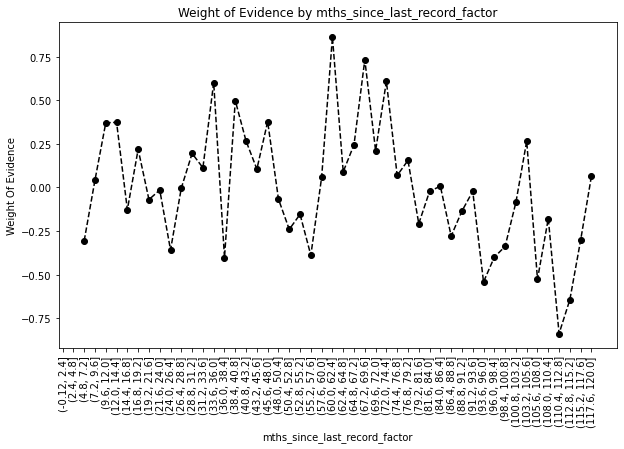

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# Storing the pre-processed dataset and making the dataset ready for calculation of PSI

In [ ]:
loan_data_inputs_2015=df_inputs_prepr
loan_data_targets_2015=df_targets_prepr

In [ ]:
loan_data_inputs_2015.shape

(421094, 320)

In [ ]:
loan_data_targets_2015.shape

(421094,)

In [ ]:
#Loading all the pre-processed data to csv files
#loan_data_prep_inputs_train.to_csv('loan_data_prep_inputs_train_final.csv')
#loan_data_prep_targets_train.to_csv('loan_data_prep_targets_train.csv')
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

In [ ]:
loan_data_inputs_2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mnths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mnths_since_earliest_cr_line_factor,mnths_since_earliest_cr_line:<140,mnths_since_earliest_cr_line:141-164,mnths_since_earliest_cr_line:165-247,mnths_since_earliest_c

In [ ]:
# We import the dataset with old data, i.e. "expected" data.
inputs_train_with_ref_cat=pd.read_csv('/content/drive/MyDrive/inputs_train_with_ref_cat.csv',index_col=0)

In [ ]:
# From the dataframe with new, "actual" data, we keep only the relevant columns.
inputs_2015_with_ref_cat=loan_data_inputs_2015.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'mnths_since_earliest_cr_line:141-164',
'mnths_since_earliest_cr_line:165-247',
'mnths_since_earliest_cr_line:248-270',
'mnths_since_earliest_cr_line:271-352',
'mnths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',]]

In [ ]:
inputs_2015_with_ref_cat.shape

(421094, 102)

In [ ]:
inputs_train_with_ref_cat.shape

(373028, 102)

In [ ]:
#We import the scorecard
df_scorecard=pd.read_csv('/content/drive/MyDrive/df_scorecard.csv',index_col=0)

In [ ]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
index,,,,,,,
0,Intercept,-1.404114,NaN,Intercept,310.991,311,311
1,grade:A,1.092539,0.0,grade,80.560,81,81
2,grade:B,0.892066,0.0,grade,65.778,66,66
3,grade:C,0.695977,0.0,grade,51.319,51,51
4,grade:D,0.508930,0.0,grade,37.527,38,38
...,...,...,...,...,...,...,...
12,total_acc:<=27,0.000000,NaN,total_acc,0.000,0,0
13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000,0,0
14,dti:>35,0.000000,NaN,dti,0.000,0,0


In [ ]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:141-164,mnths_since_earliest_cr_line:165-247,mnths_since_earliest_cr_line:248-270,mnths_since_earliest_cr_line:271-352,mnths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_acc:28-51,total_acc:>=52,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mnths_since_earliest_cr_line:<140,inq_last_6mths:>6,total_acc:<=27,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
427211,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
206088,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
136020,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
412305,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
36159,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:141-164,mnths_since_earliest_cr_line:165-247,mnths_since_earliest_cr_line:248-270,mnths_since_earliest_cr_line:271-352,mnths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_acc:28-51,total_acc:>=52,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mnths_since_earliest_cr_line:<140,inq_last_6mths:>6,total_acc:<=27,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(103, 1)

In [ ]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_train.head()

,0
427211,684
206088,589
136020,660
412305,530
36159,513


In [ ]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_2015.head()

,0
0,760
1,769
2,653
3,641
4,714


In [ ]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)
# Here we concatenate the scores we calculated with the rest of the variables in the two dataframes:
# the one with old ("expected") data and the one with new ("actual") data.

In [ ]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# Here we rename the columns containing scores to "Score" in both dataframes.

In [ ]:
inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:141-164,mnths_since_earliest_cr_line:165-247,mnths_since_earliest_cr_line:248-270,mnths_since_earliest_cr_line:271-352,mnths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_acc:28-51,total_acc:>=52,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mnths_since_earliest_cr_line:<140,inq_last_6mths:>6,total_acc:<=27,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,Score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,760
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,769
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,653
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,641
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,714


In [ ]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [ ]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

# Population Stability Index: Calculation and Interpretation

In [ ]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.

In [ ]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.

In [ ]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
# We concatenate the two dataframes along the columns.

In [ ]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.
# The old index, which is the dummy variable name, becomes a column, named 'index'.
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [ ]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [ ]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New
0,Intercept,Intercept,1.000000,1.000000
1,grade:A,grade,0.160200,0.174154
2,grade:B,grade,0.294160,0.279287
3,grade:C,grade,0.268733,0.286318
4,grade:D,grade,0.164862,0.148789
...,...,...,...,...
110,Score:600-650,Score,0.268023,0.276371
111,Score:650-700,Score,0.138890,0.300417
112,Score:700-750,Score,0.057371,0.240554
113,Score:750-800,Score,0.008737,0.092775


In [ ]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.

In [ ]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160200,0.174154,0.001165
2,grade:B,grade,0.294160,0.279287,0.000772
3,grade:C,grade,0.268733,0.286318,0.001115
4,grade:D,grade,0.164862,0.148789,0.001649
5,grade:E,grade,0.076702,0.082993,0.000496
...,...,...,...,...,...
110,Score:600-650,Score,0.268023,0.276371,0.000256
111,Score:650-700,Score,0.138890,0.300417,0.124616
112,Score:700-750,Score,0.057371,0.240554,0.262576
113,Score:750-800,Score,0.008737,0.092775,0.198554


In [ ]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original feature name
Score                           1.947454
addr_state                      0.003837
annual_inc                      0.005445
dti                             0.078143
emp_length                      0.007619
grade                           0.006775
home_ownership                  0.004275
initial_list_status             0.333717
inq_last_6mths                  0.046465
int_rate                        0.079230
mnths_since_earliest_cr_line    0.033507
mths_since_issue_d              2.388305
mths_since_last_delinq          0.011594
mths_since_last_record          0.056276
purpose                         0.011645
term                            0.013099
total_acc                       0.001121
verification_status             0.048219
Name: Contribution, dtype: float64